## 2. 데이터 수집

In [6]:
import pandas as pd
import numpy as np

train = pd.read_csv('reg_data/train.csv')
test = pd.read_csv('reg_data/test.csv')
submission = pd.read_csv('reg_data/sample_submission.csv')

# 3. 탐색적 데이터 분석 및 전처리(EDA:Exploratory Data Analysis)
- 데이터를 이해하자!
- 결측치, 이상치, 오류가 있는지 확인
    - 결측치 : 컬럼의 값이 없는 데이터
    - 이상치 : 다른 값들과 차이가 큰 값
    - 오류치 >> 이상치 >> 결측치 순으로 데이터 전처리하기!
- 기술 통계
- 상관 관계
- 시각화
### 데이터 전처리 방법
- 통합(Grouping, 범주형 데이터의 클래스가 너무 많을 시, 사용),
- 인코딩,
- 정규화,
- 라벨 인코딩 등을 통해 데이터 전처리

In [7]:
train1 = train.copy()

In [8]:
train.columns

Index(['ID', 'ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

## 칼럼 정보
- ID : 아이디
- ADDRESS : 주소 
- SUBURB : 동네 이름
- PRICE : 가격 
- BEDROOMS : 침실
- BATHROOMS : 화장실 
- GARAGE : 차고 수
- LAND_AREA : 부지 면적 
- FLOOR_AREA : 건물 면적
- BUILD_YEAR : 건축년도
- CBD_DIST : 비즈니스 중심 구역까지 거리
- NEAREST_STN : 근처 역
- NEAREST_STN_DIST : 근처역까지 거리
- DATE_SOLD : 팔매된 날짜
- POSTCODE : 우편번호
- LATITUDE: 위도
- LONGITUDE : 경도
- NEAREST_SCH : 근처 학교
- NEAREST_SCH_DIST : 학교까지 거리
- NEAREST_SCH_RANK : 근처 학교 등급

- 범주형 데이터 : ADDRESS, SUBURB, BEDROOMS, BATHROOMS, GARAGE, BUILD_YEAR,NEAREST_STN, NEAREST_SCH, 
- 수치형 데이터 : LAND_AREA,FLOOR_AREA, CBD_DIST, NEAREST_STN_DIST, NEAREST_SCH_DIST, NEAREST_SCH_RANK
- ?? : POSTCODE(=LATITUDE, LONGITUDE),  DATE_SOLD
- 라벨(회귀) : PRICE

## 3.1 결측치 확인

In [9]:
train1.corr()

,ID,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
ID,1.000000,0.002149,0.007004,-0.000146,-0.010428,-0.007281,0.006915,0.000651,0.000779,0.003104,0.003222,-0.011983,-0.006936,-0.000778,-0.010885
PRICE,0.002149,1.000000,0.256909,0.386485,0.124276,0.046778,0.539524,-0.148771,-0.357368,-0.099370,-0.162925,0.046722,-0.183514,-0.024030,-0.453937
BEDROOMS,0.007004,0.256909,1.000000,0.558640,0.180447,0.047265,0.536185,0.234275,0.120185,0.105443,0.019795,0.023951,-0.011119,0.093771,0.029626
BATHROOMS,-0.000146,0.386485,0.558640,1.000000,0.181213,0.028357,0.556328,0.345848,0.028758,0.033446,-0.032696,0.048622,-0.094269,0.053522,-0.095940
GARAGE,-0.010428,0.124276,0.180447,0.181213,1.000000,0.042186,0.186341,0.045461,0.042033,0.101591,0.019979,-0.011987,0.085201,0.094102,0.014924
LAND_AREA,-0.007281,0.046778,0.047265,0.028357,0.042186,1.000000,0.066470,0.009614,0.114915,0.201562,0.034252,-0.002033,0.130394,0.245674,0.034244
FLOOR_AREA,0.006915,0.539524,0.536185,0.556328,0.186341,0.066470,1.000000,0.230423,0.022669,0.106088,-0.040491,0.039342,-0.039926,0.117837,-0.136373
BUILD_YEAR,0.000651,-0.148771,0.234275,0.345848,0.045461,0.009614,0.230423,1.000000,0.258332,0.090911,0.038833,0.045702,-0.063877,0.096881,0.151206
CBD_DIST,0.000779,-0.357368,0.120185,0.028758,0.042033,0.114915,0.022669,0.258332,1.000000,0.450933,0.249753,-0.194665,-0.055923,0.379823,0.324407
NEAREST_STN_DIST,0.003104,-0.099370,0.105443,0.033446,0.101591,0.201562,0.106088,0.090911,0.450933,1.000000,0.205185,0.022709,0.497753,0.636990,0.184562


- 결측치 있는 칼럼 : GARAGE, BUILD_YEAR, NEAREST_SCH_RANK

In [10]:
train1 = train1.dropna(axis = 0)
not_null_test = test.dropna(axis = 0)

In [11]:
col = ['BEDROOMS', 'BATHROOMS',
       'LAND_AREA', 'FLOOR_AREA', 'CBD_DIST',
       'NEAREST_STN_DIST', 'NEAREST_SCH_DIST']

In [12]:
X_train = train1.loc[:,col]
y_train = train1.loc[:, 'PRICE']
X_test = test.loc[:, col]

In [13]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18510 entries, 0 to 18509
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18510 non-null  int64  
 1   ADDRESS           18510 non-null  object 
 2   SUBURB            18510 non-null  object 
 3   PRICE             18510 non-null  int64  
 4   BEDROOMS          18510 non-null  int64  
 5   BATHROOMS         18510 non-null  int64  
 6   GARAGE            17143 non-null  float64
 7   LAND_AREA         18510 non-null  int64  
 8   FLOOR_AREA        18510 non-null  int64  
 9   BUILD_YEAR        16782 non-null  float64
 10  CBD_DIST          18510 non-null  int64  
 11  NEAREST_STN       18510 non-null  object 
 12  NEAREST_STN_DIST  18510 non-null  int64  
 13  DATE_SOLD         18510 non-null  object 
 14  POSTCODE          18510 non-null  int64  
 15  LATITUDE          18510 non-null  float64
 16  LONGITUDE         18510 non-null  float6

(None, None)

In [14]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

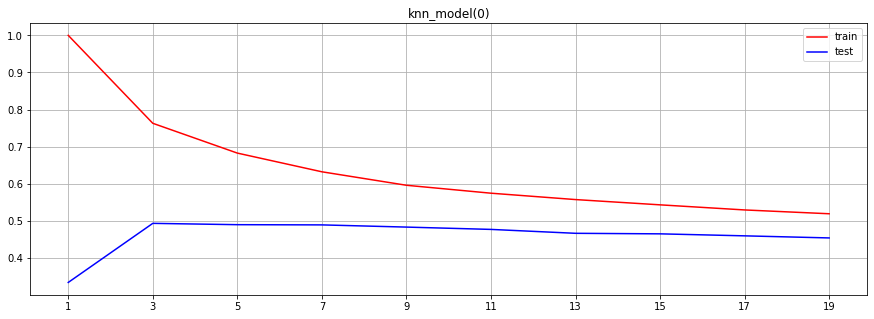

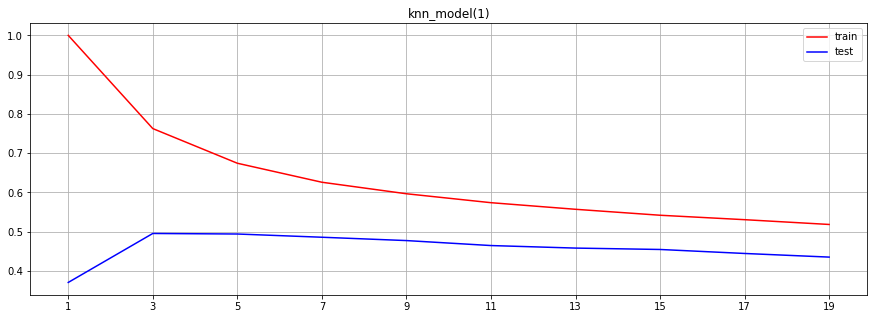

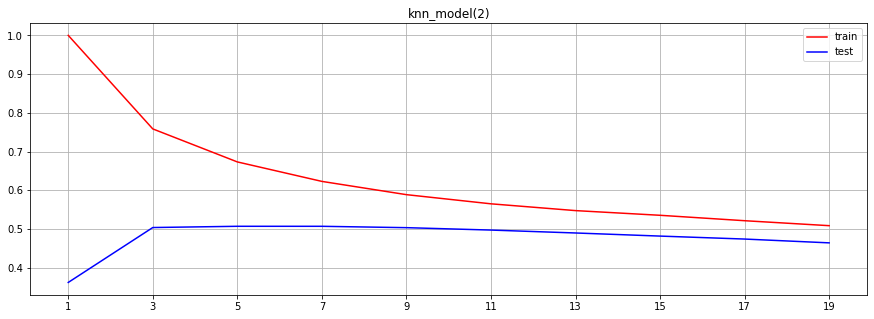

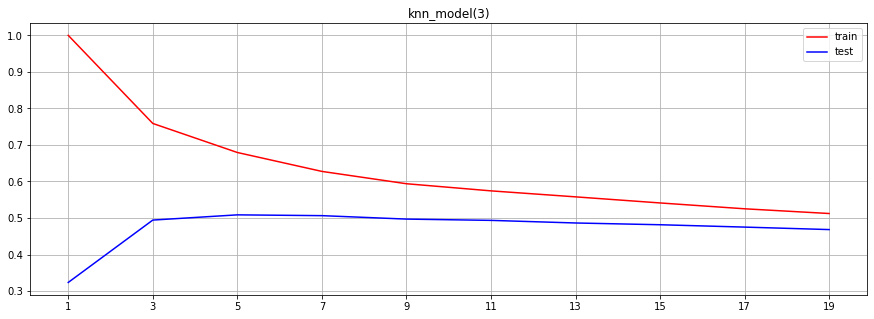

KeyboardInterrupt: 

In [15]:
# KNN 모델

for i in range(100) :
    X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=i)
    train_acc = []
    test_acc = []

    neighbor = range(1, 20, 2)
    for k in neighbor :
        knn_model2 = KNeighborsRegressor(n_neighbors=k)
        knn_model2.fit(X_train2, y_train2)
        train_acc.append(knn_model2.score(X_train2, y_train2))
        test_acc.append(knn_model2.score(X_val, y_val))
    plt.figure(figsize=(15, 5))
    plt.plot(neighbor, train_acc, c='r', label = 'train')
    plt.plot(neighbor, test_acc, c='b', label = 'test')
    plt.xticks( range(1, 20, 2))
    plt.grid()
    plt.title(f'knn_model({i})')
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
#4- /20-3/43-5/45-5
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=45)

knn_model2 = KNeighborsRegressor(n_neighbors=5)
knn_model2.fit(X_train2, y_train2)
submission['PRICE'] = knn_model2.predict(X_test)

In [ ]:
submission.to_csv('reg_data/pred_KNN_mode.csv', index=False)

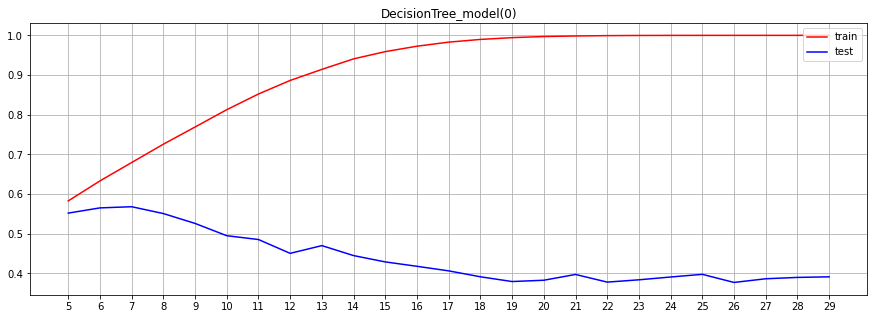

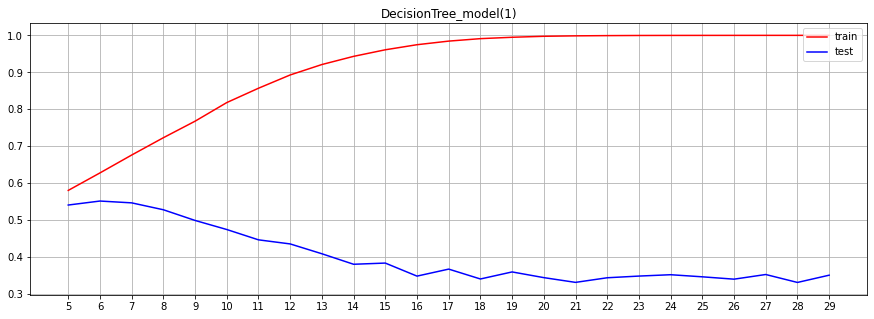

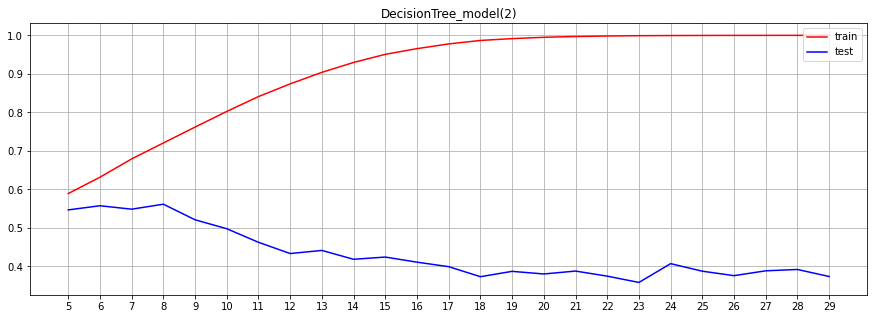

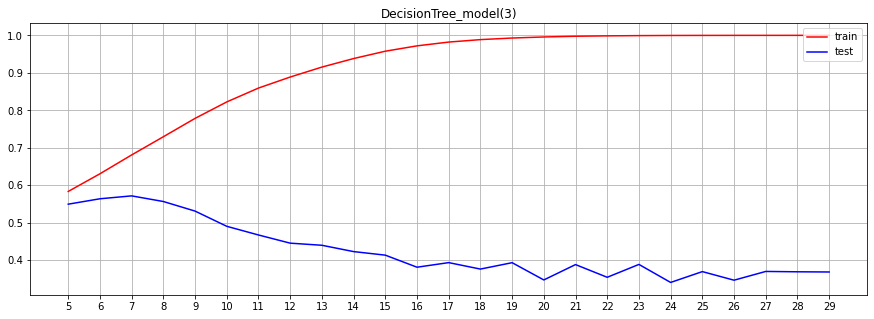

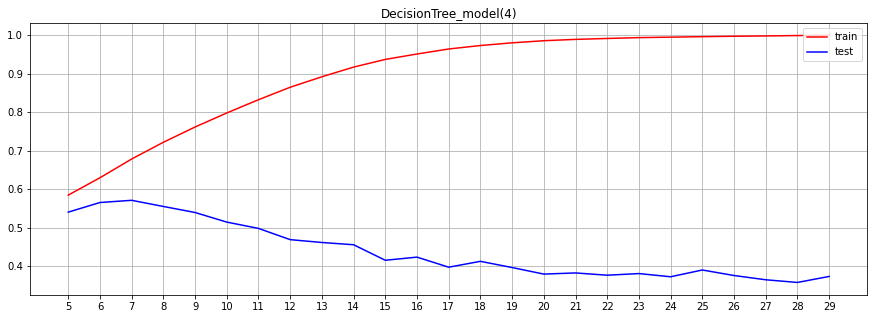

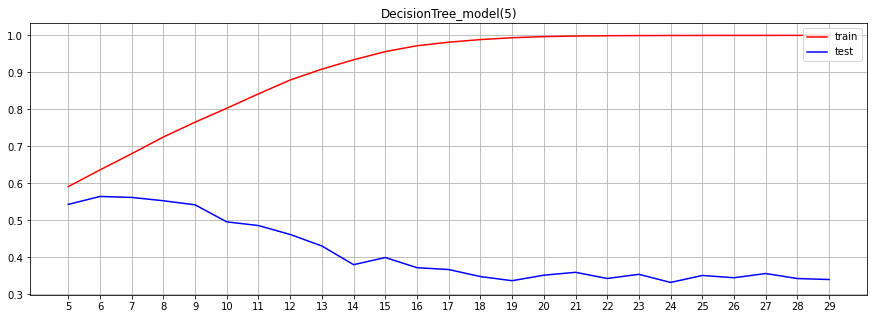

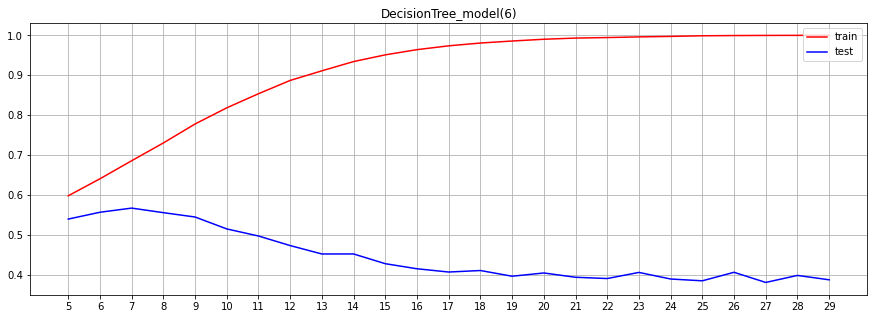

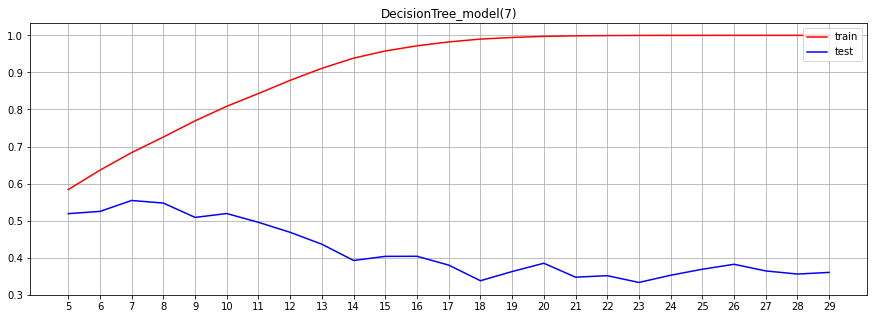

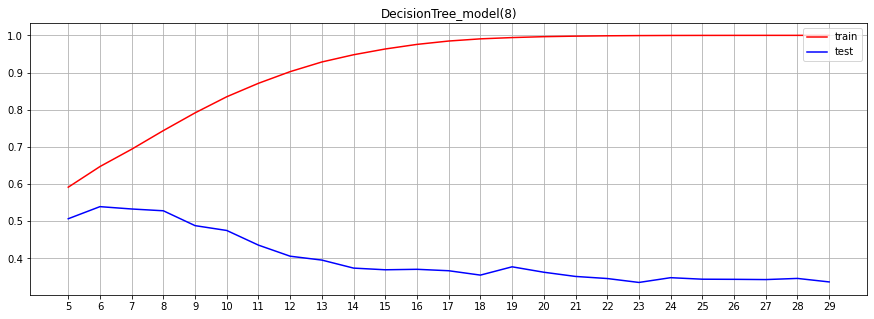

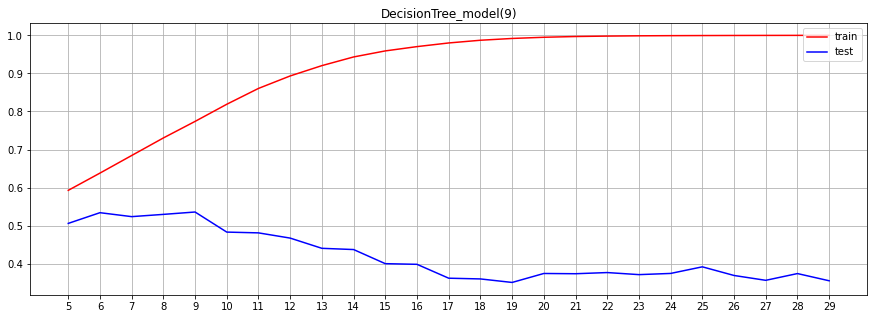

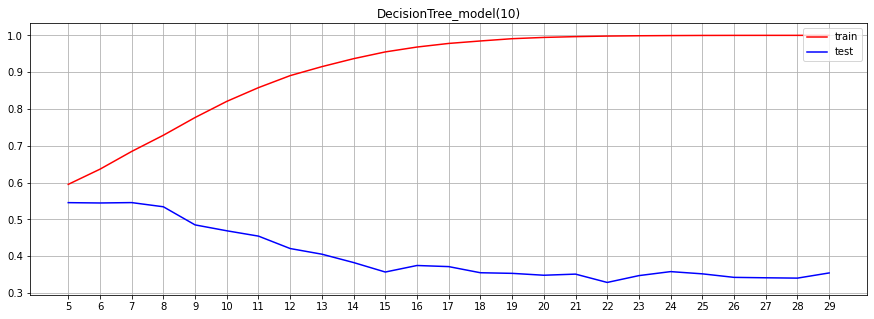

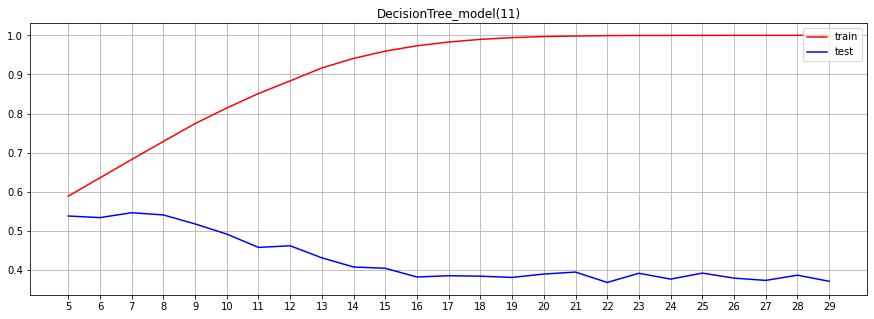

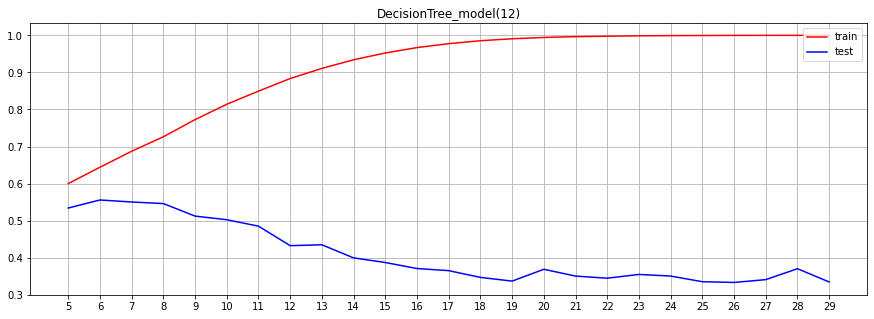

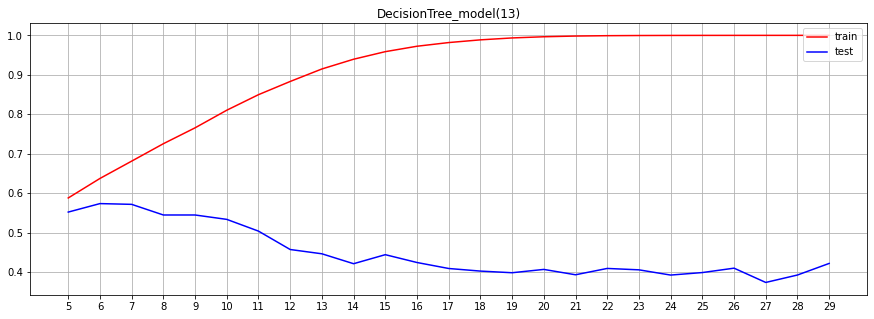

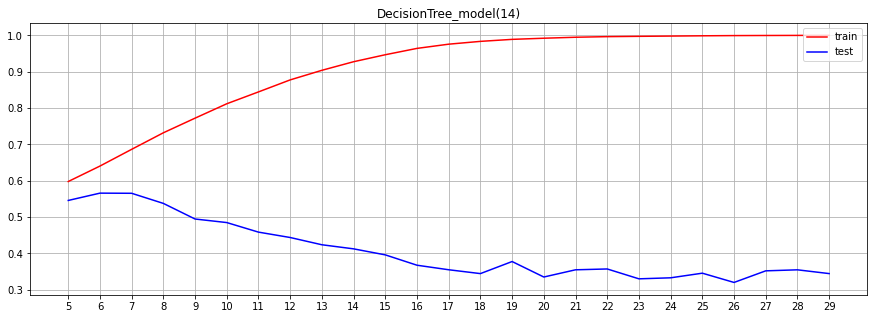

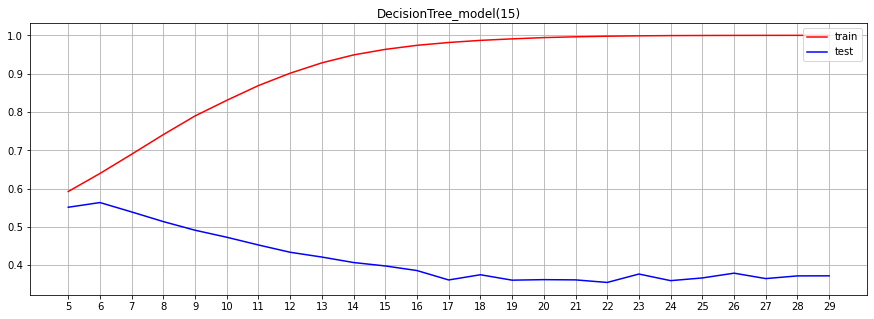

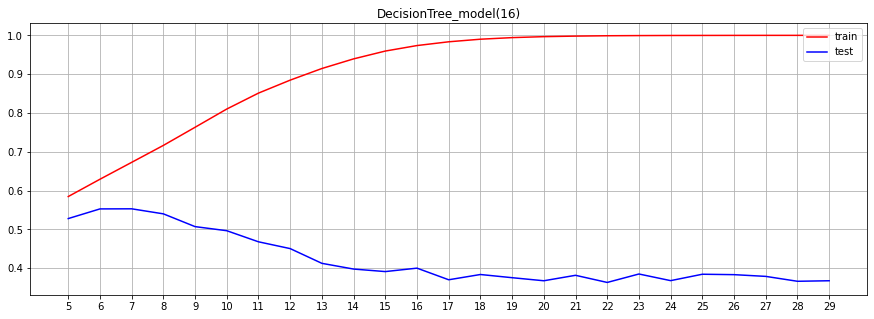

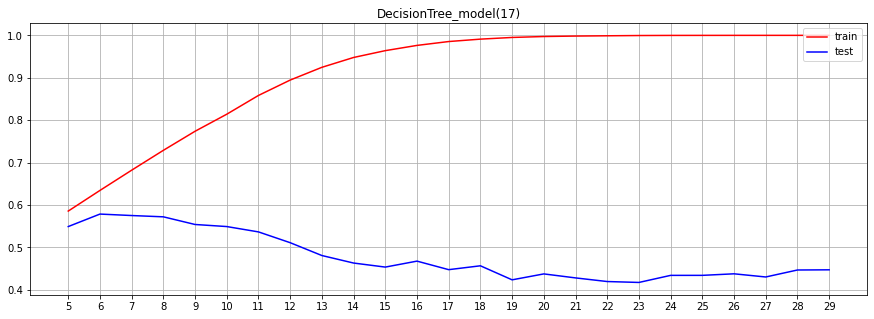

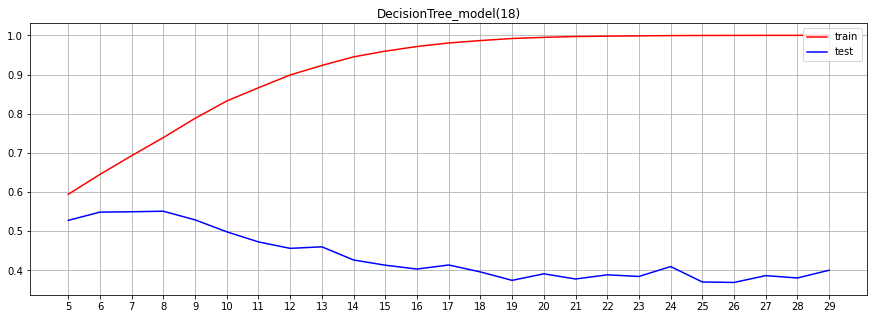

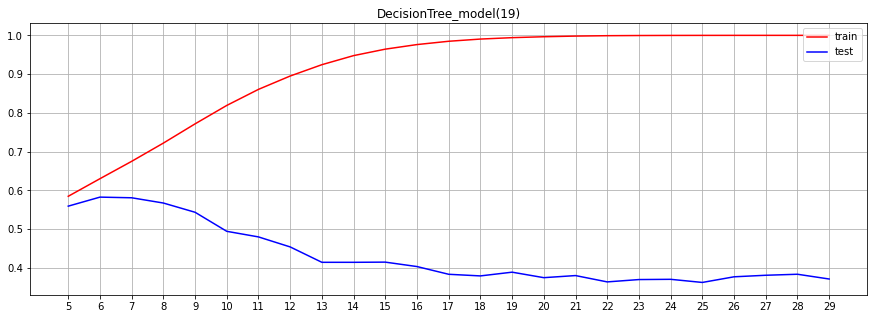

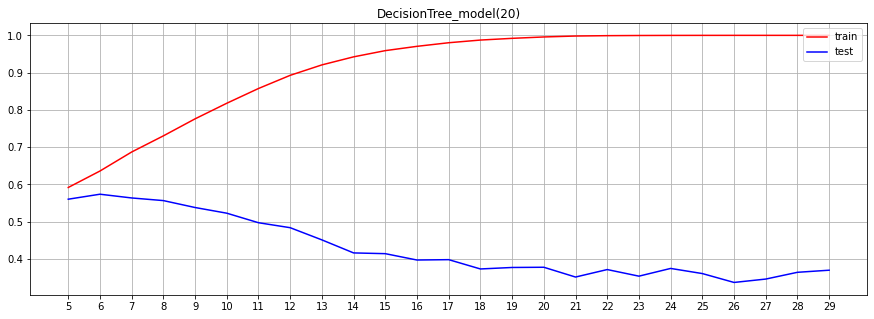

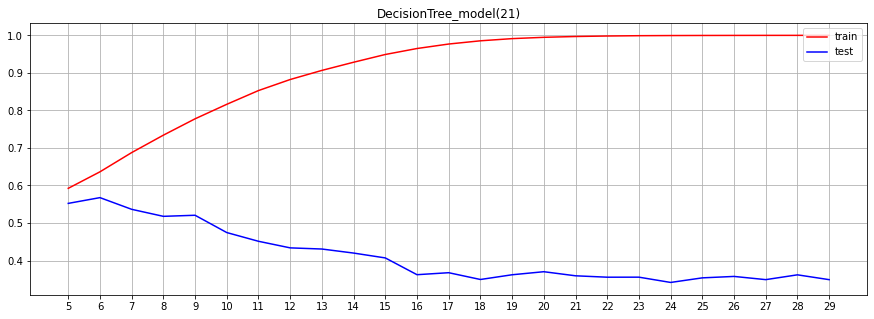

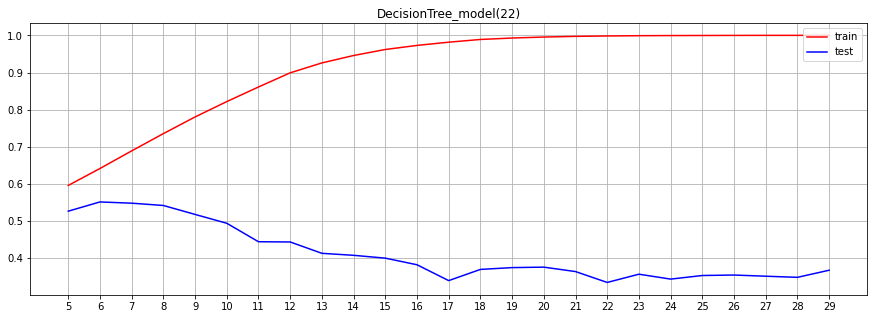

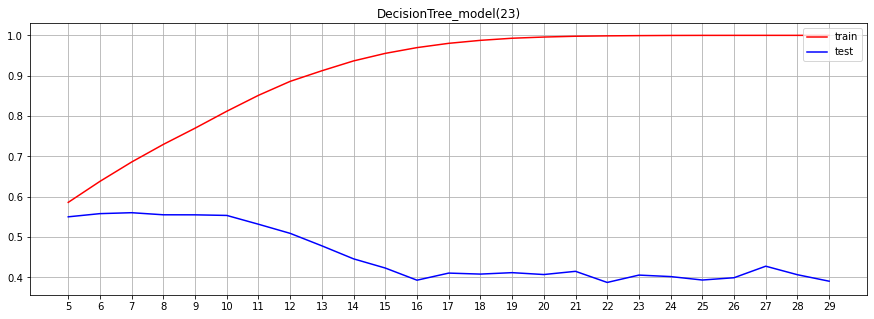

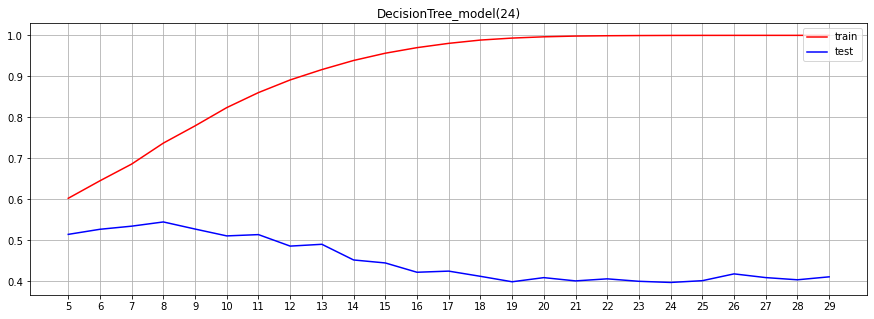

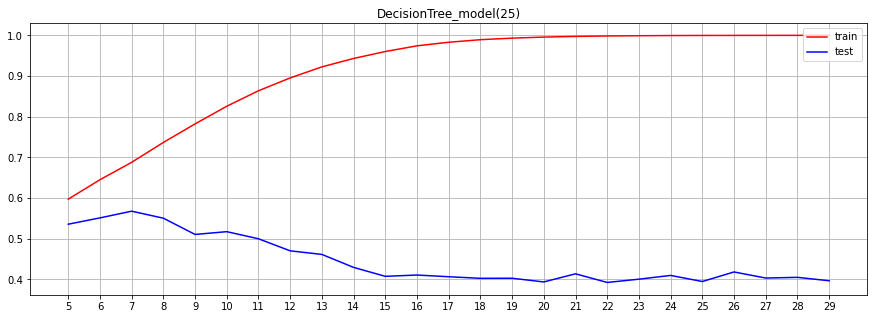

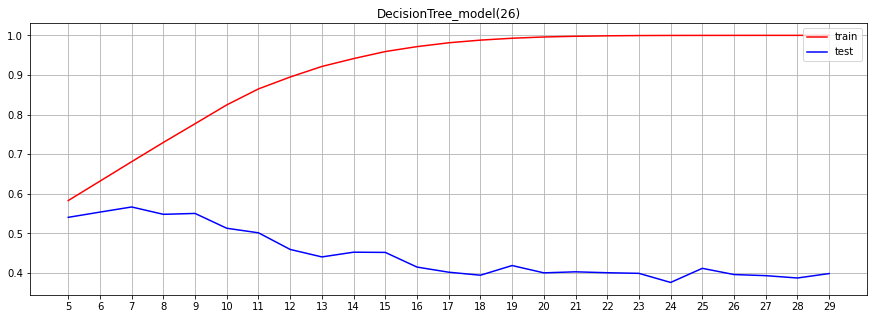

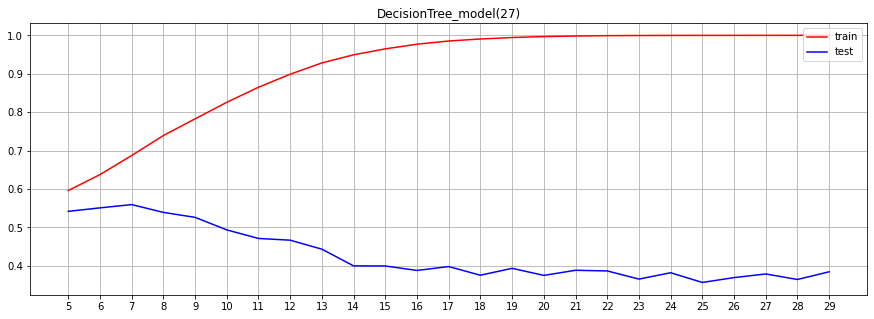

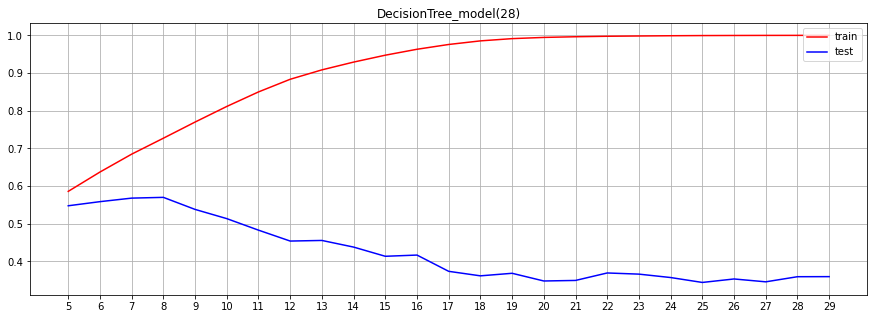

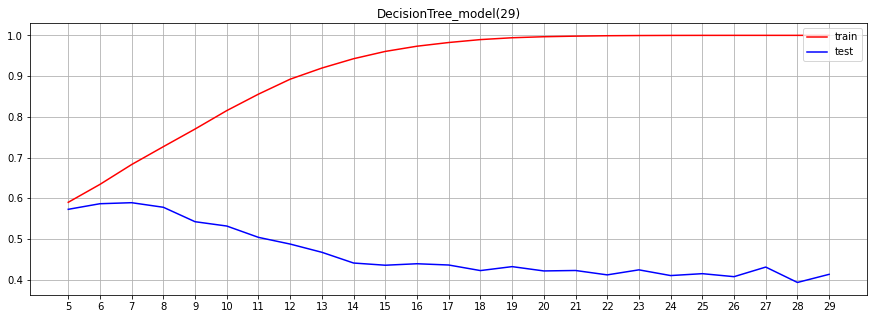

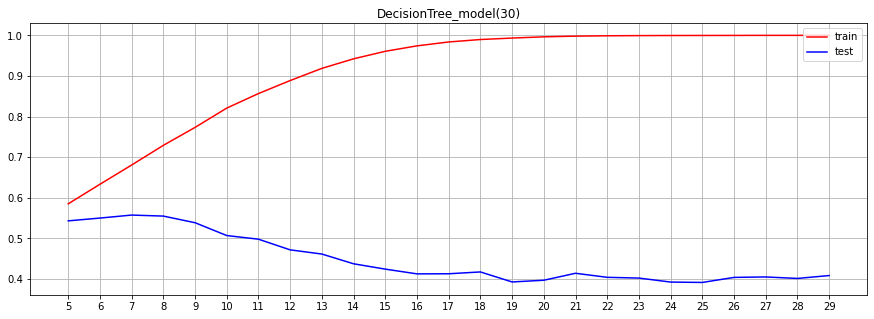

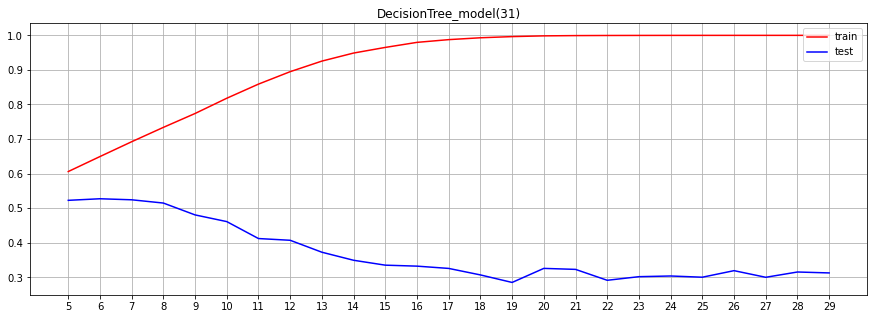

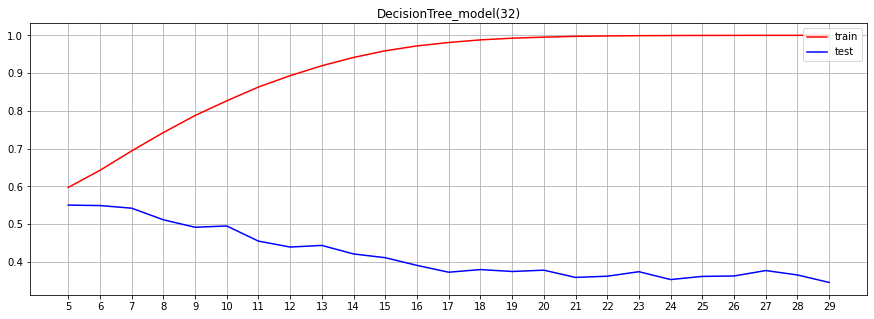

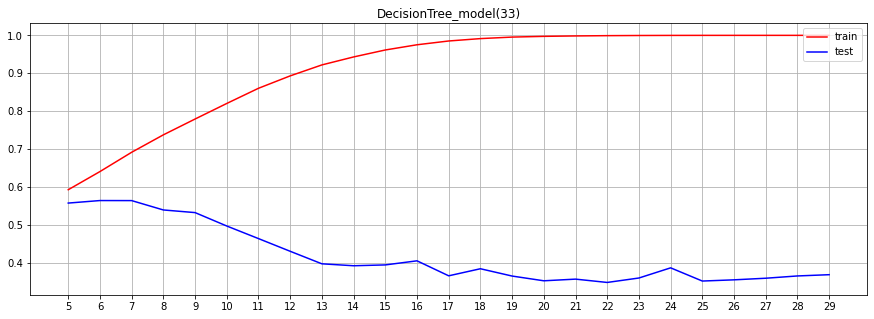

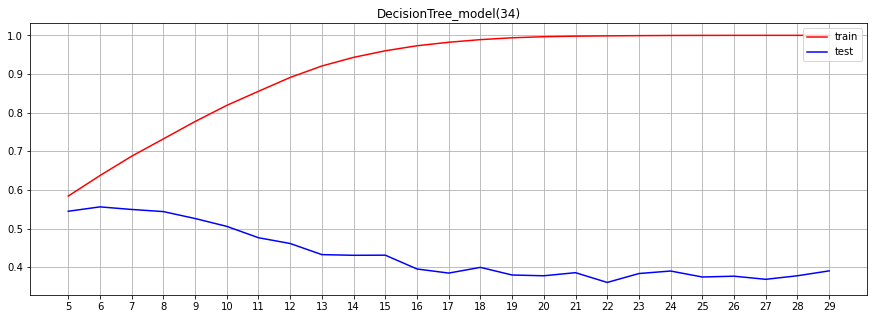

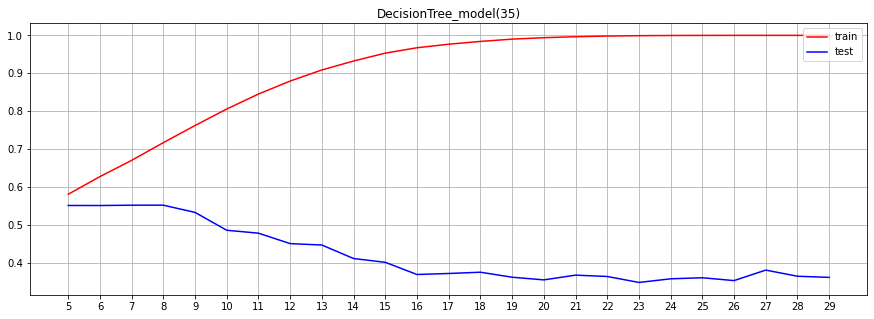

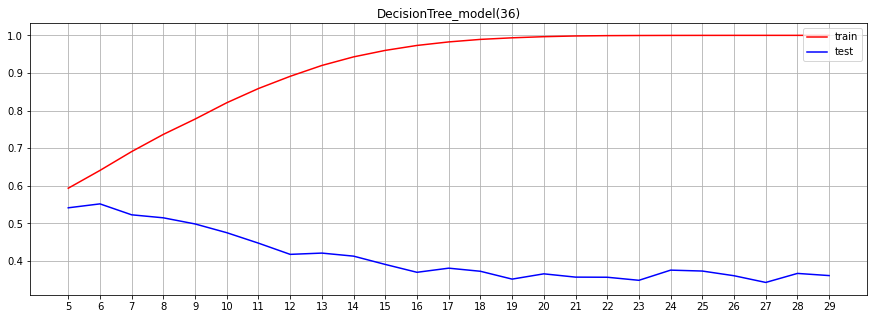

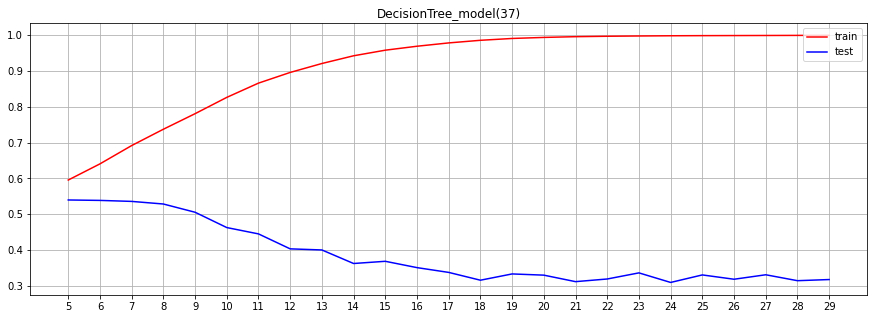

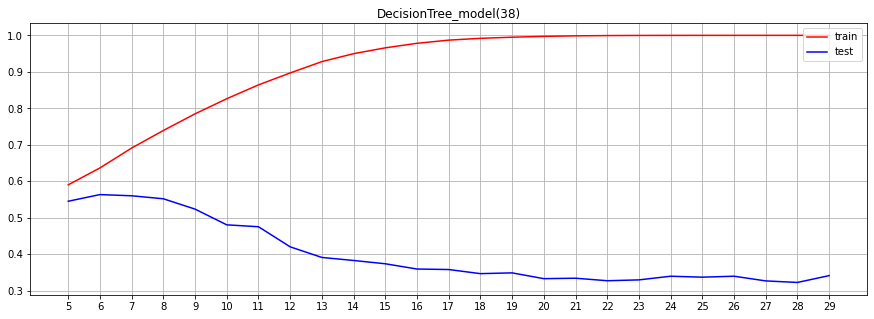

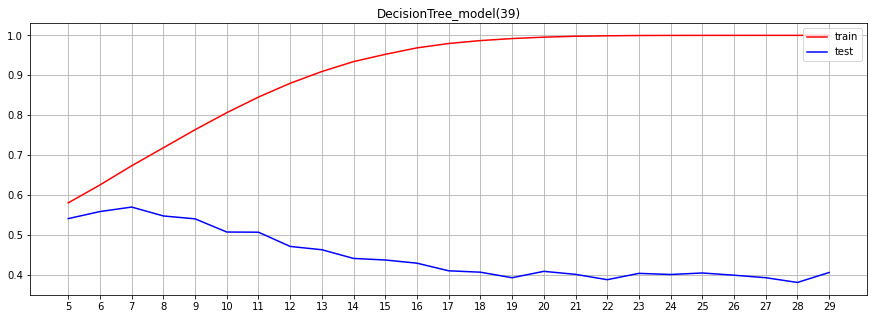

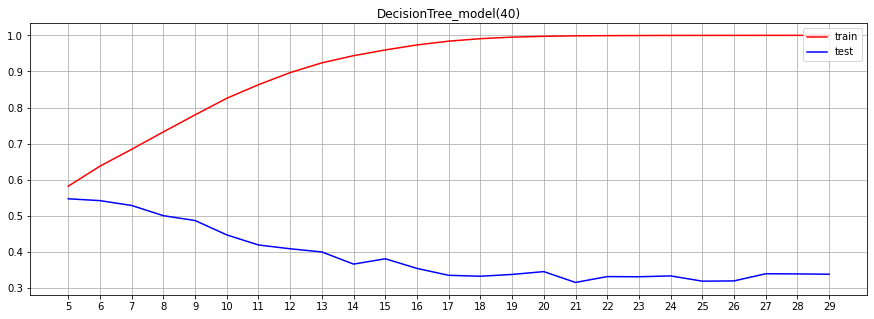

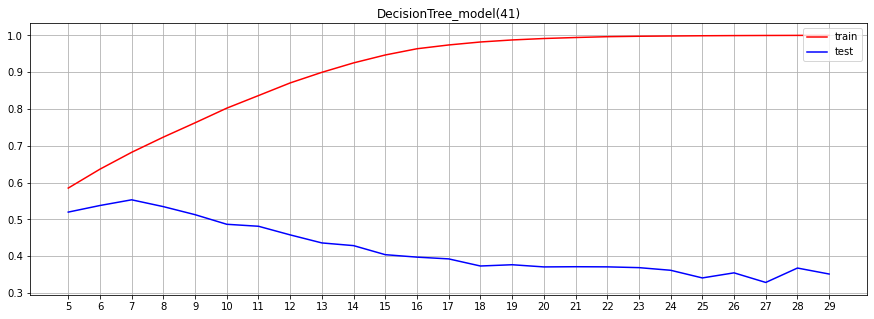

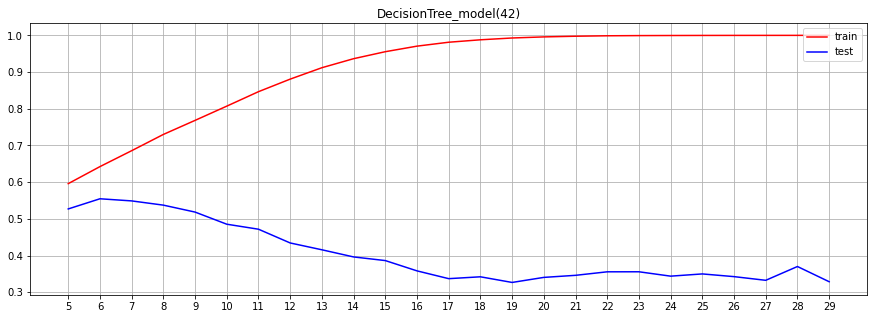

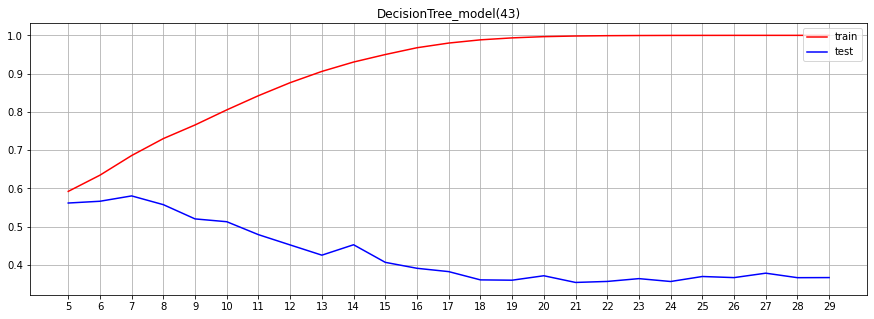

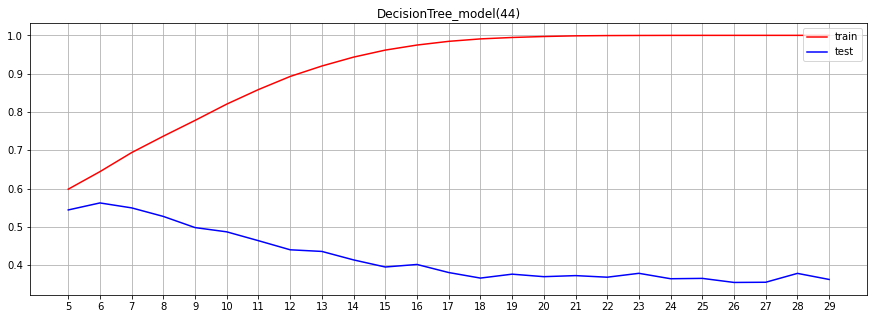

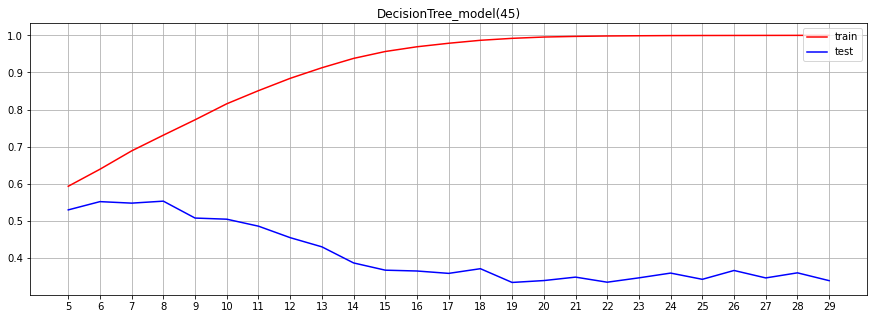

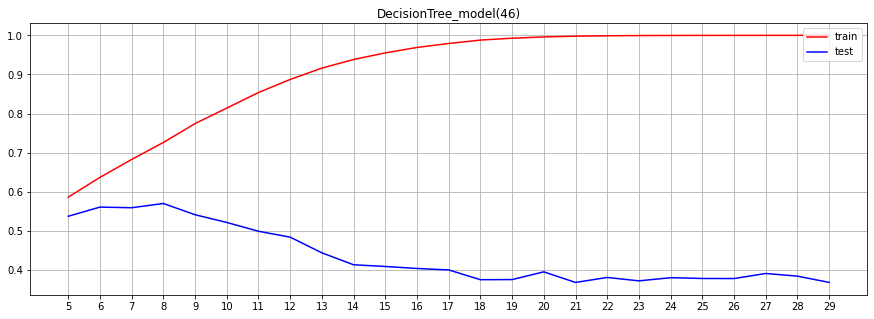

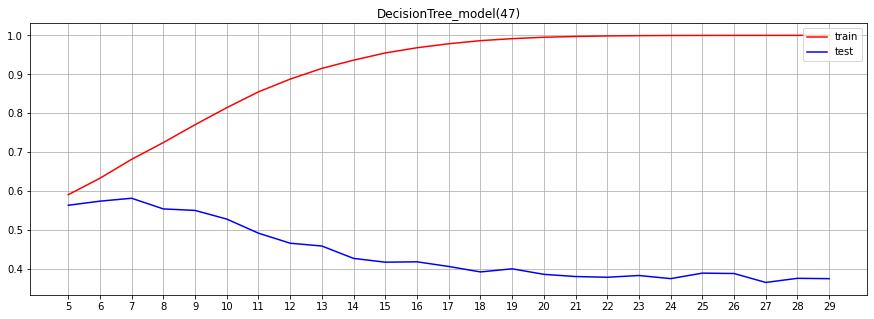

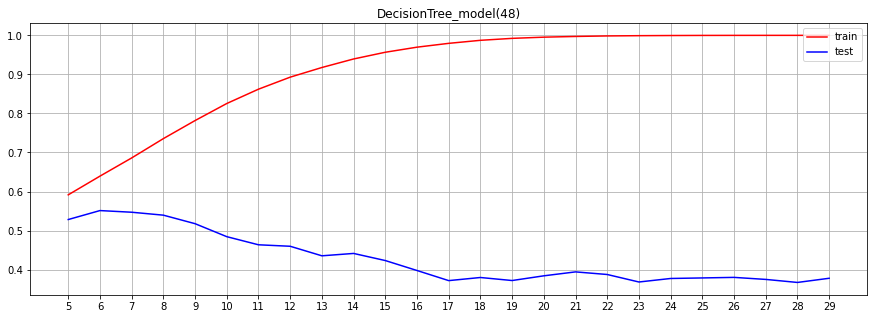

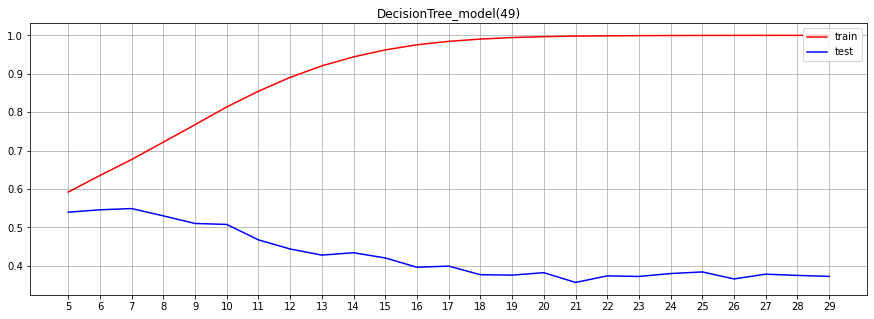

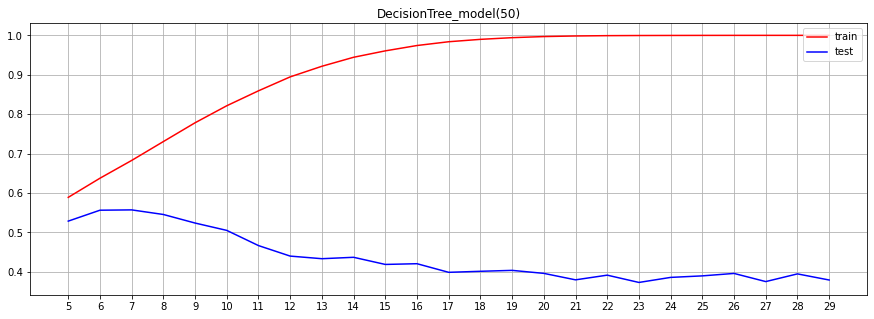

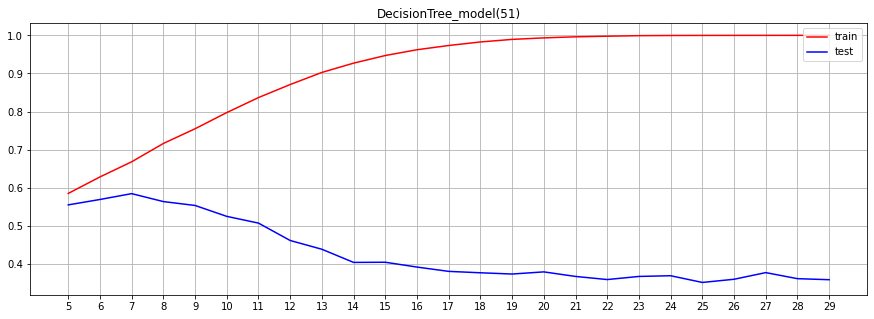

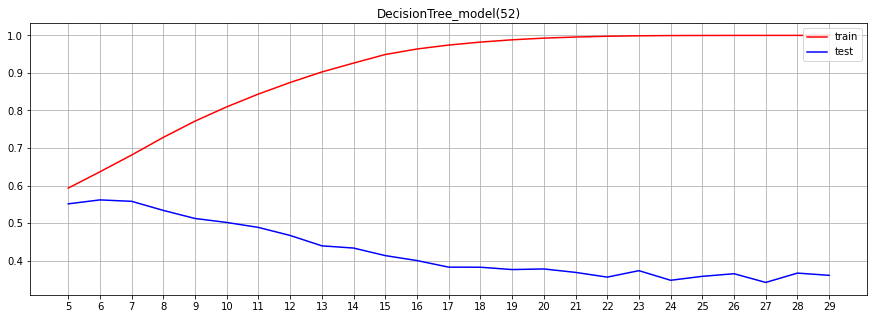

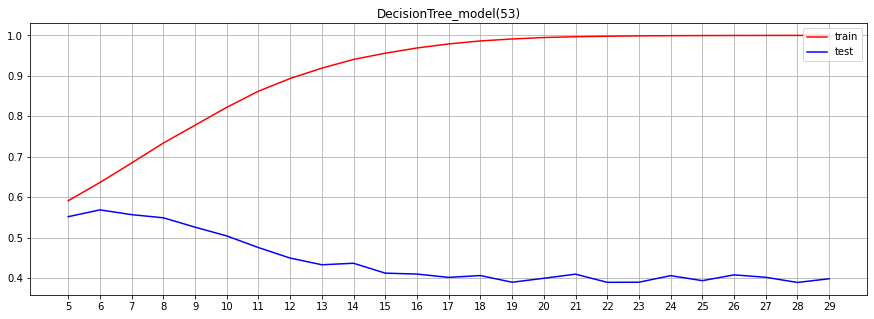

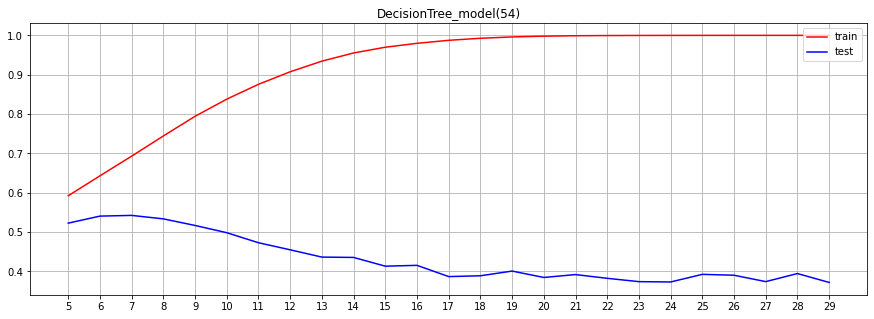

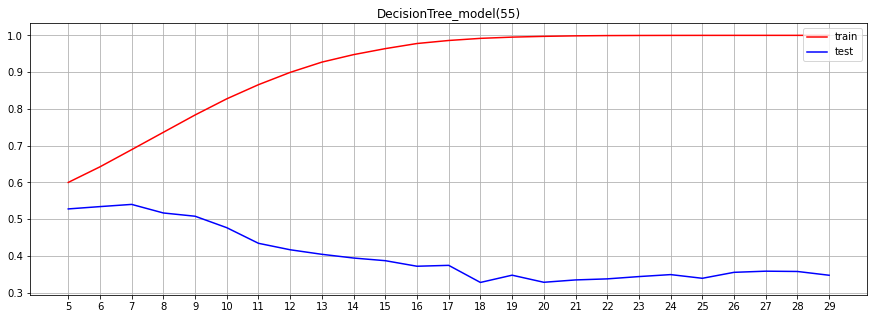

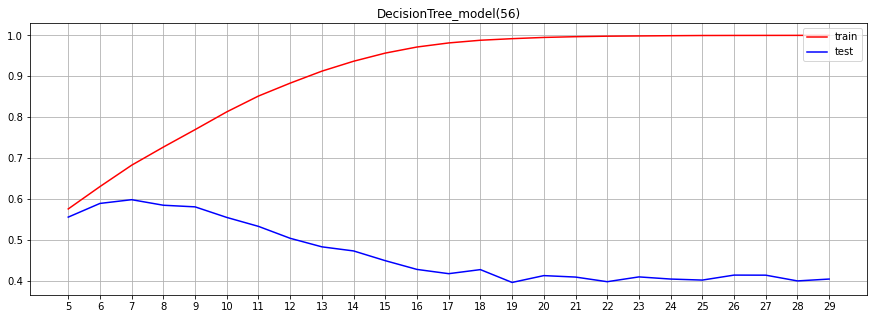

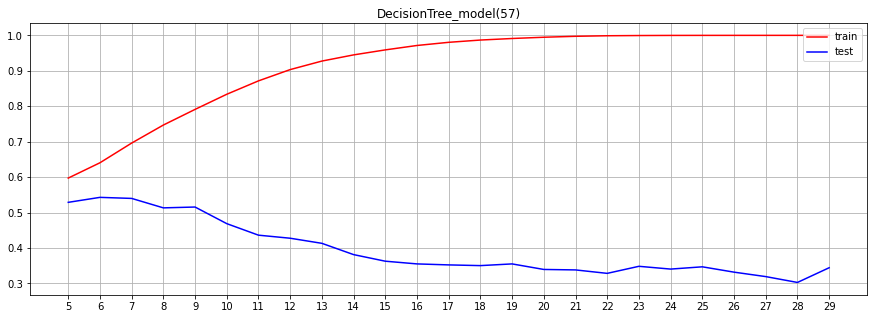

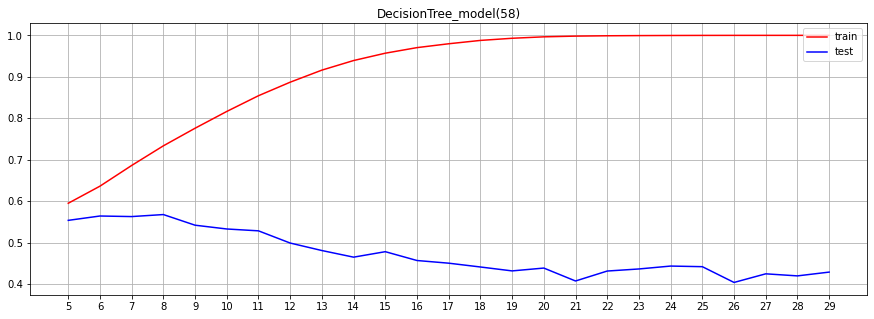

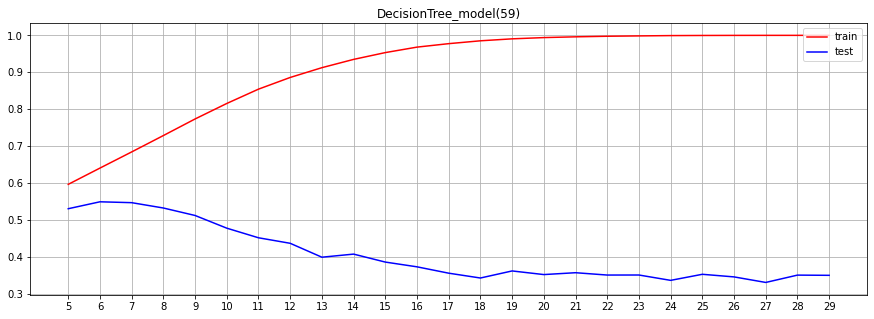

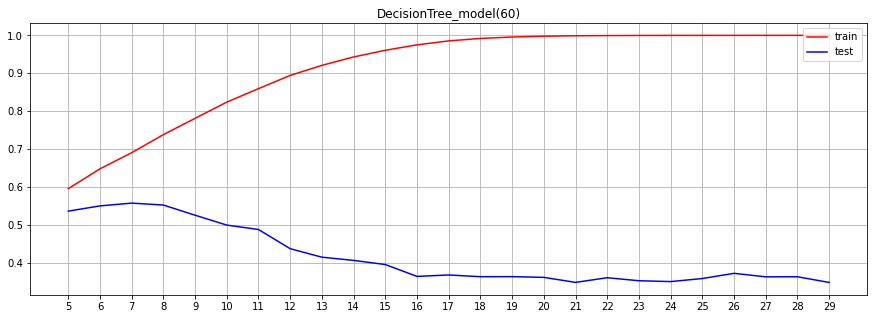

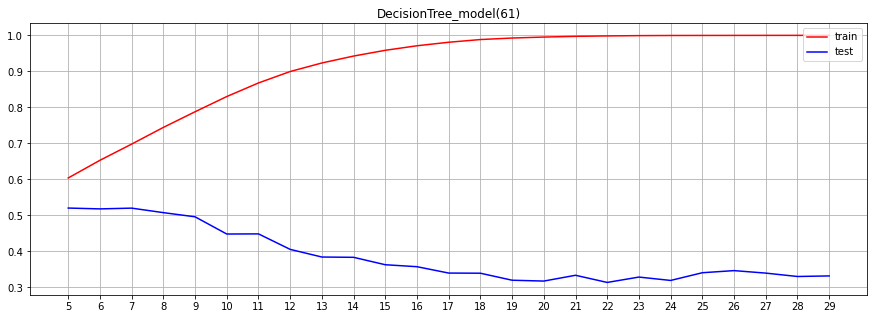

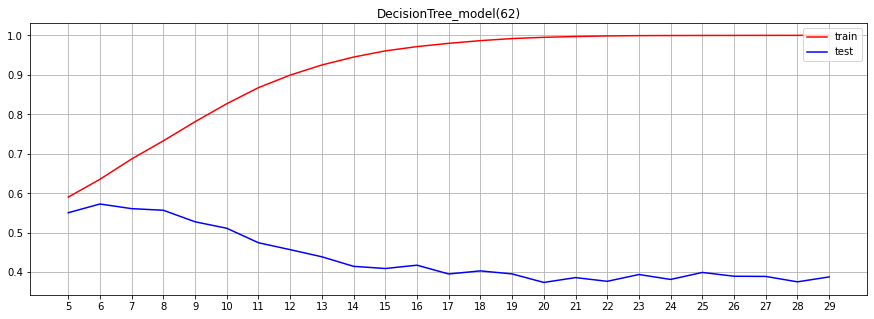

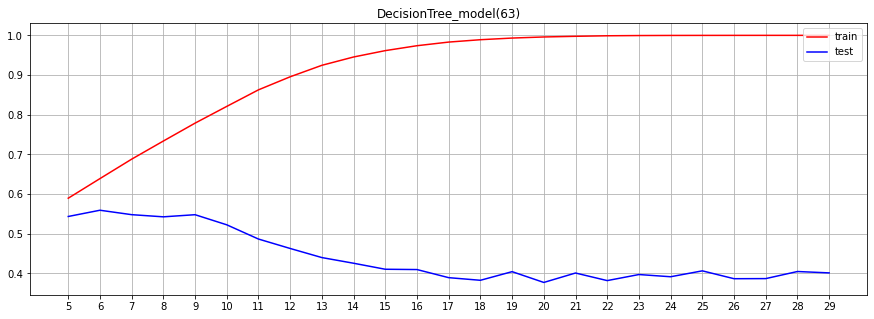

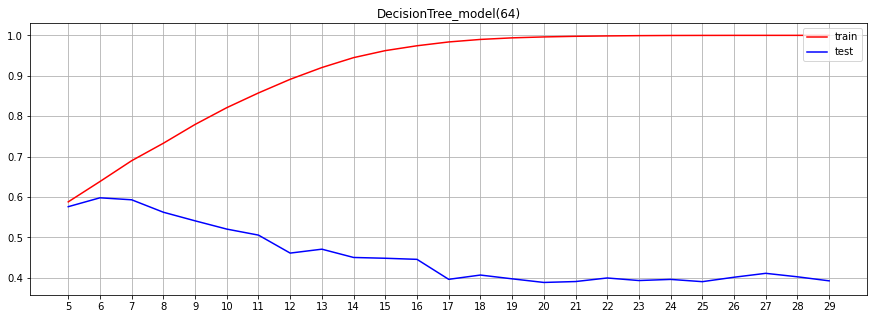

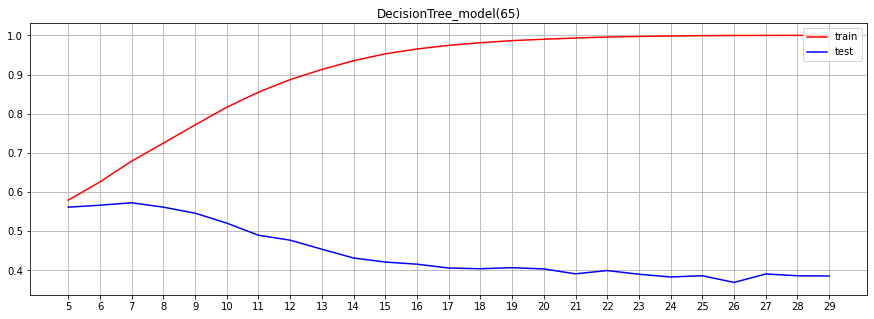

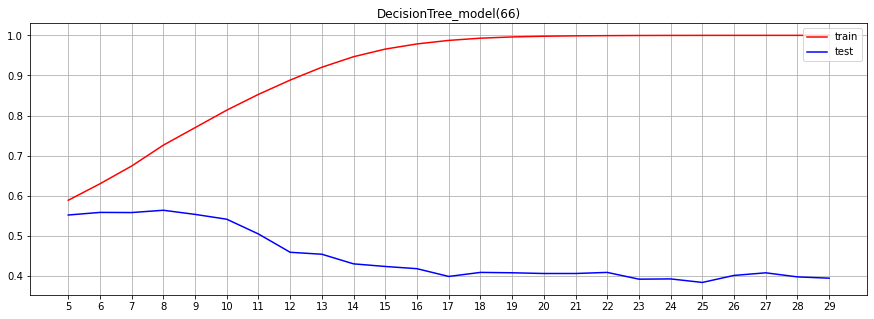

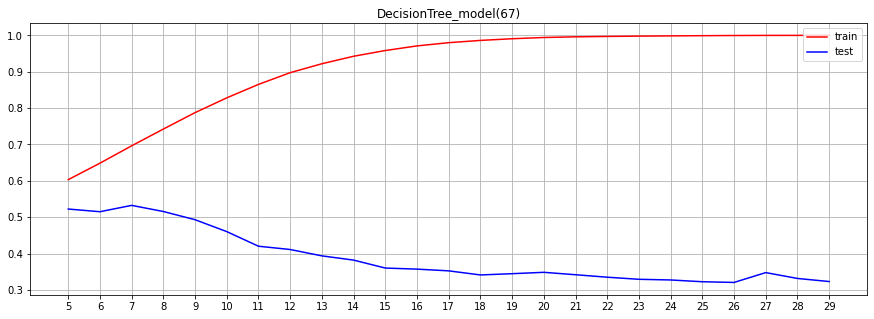

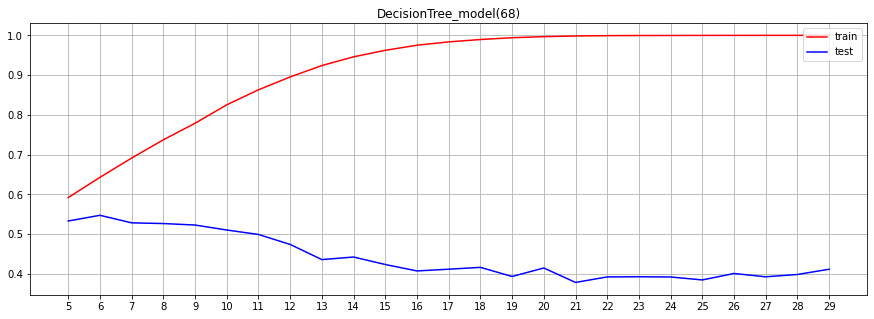

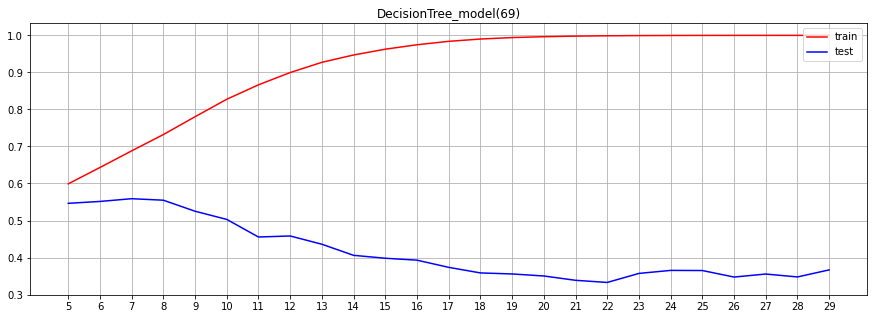

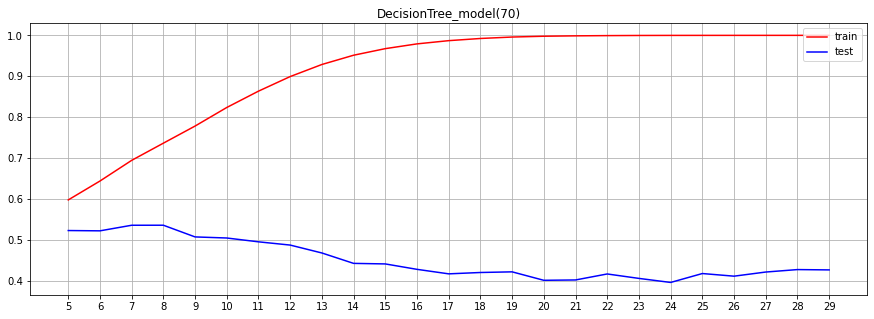

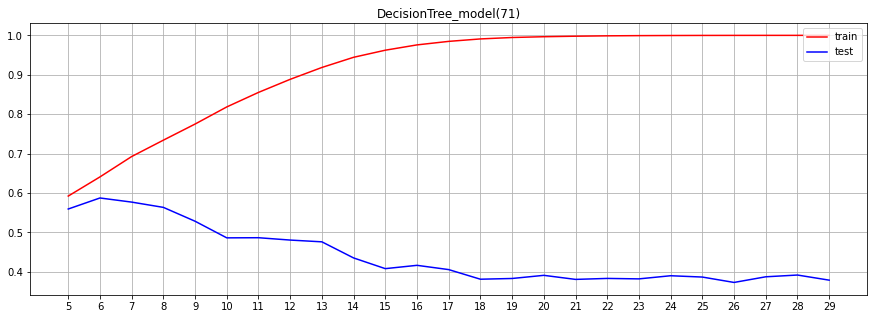

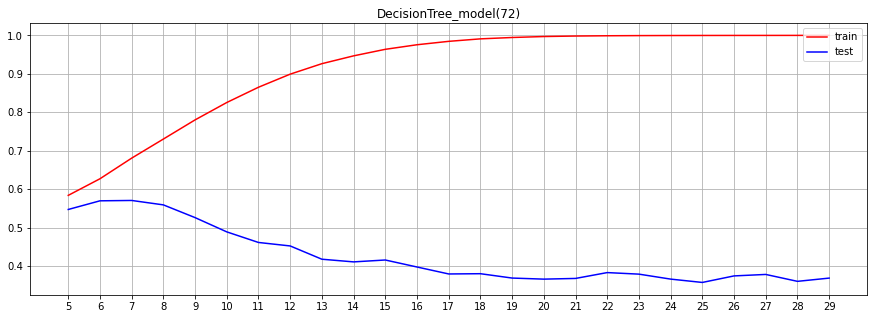

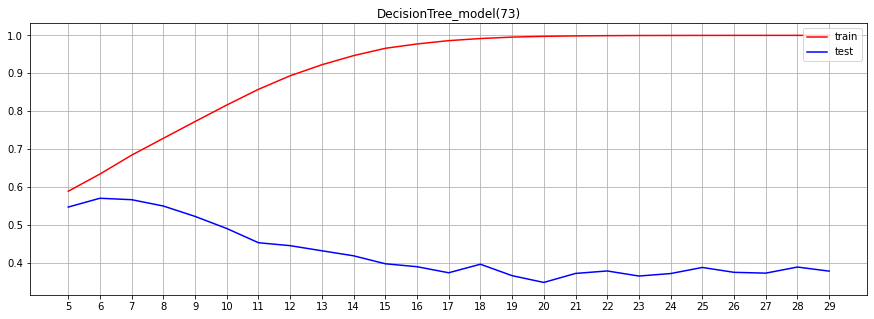

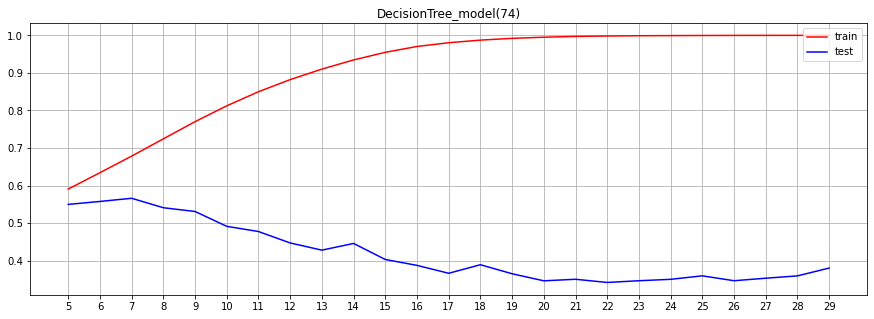

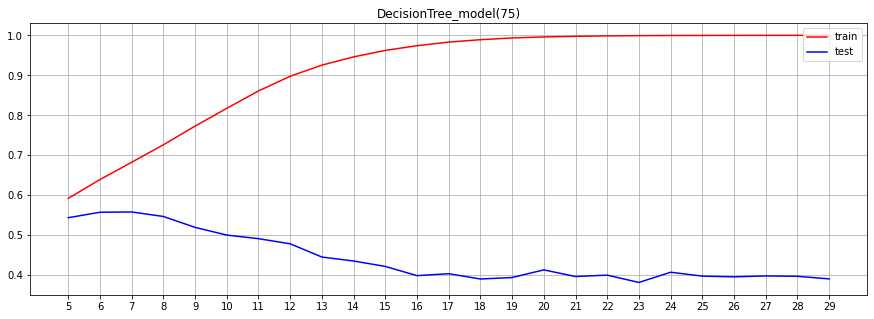

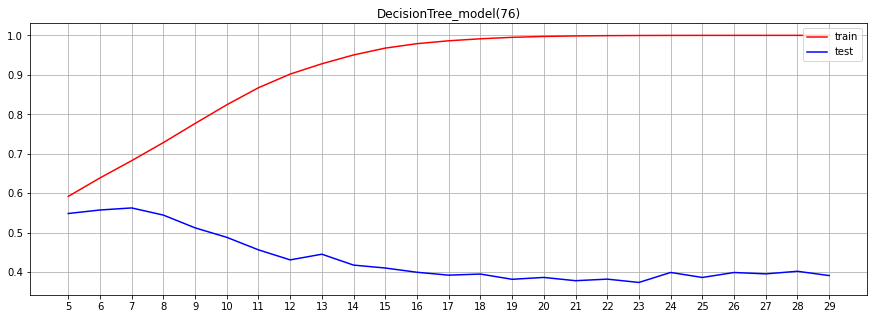

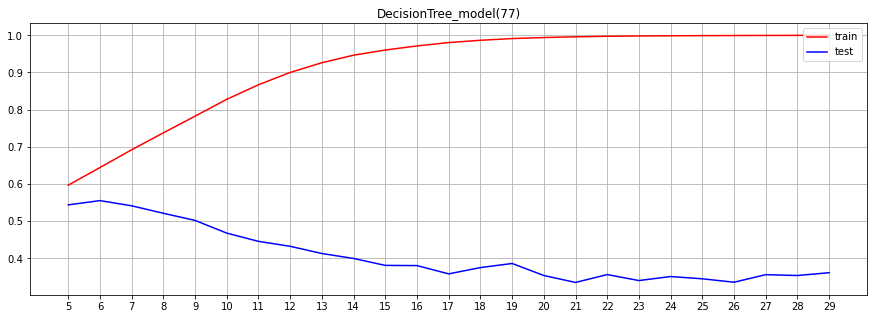

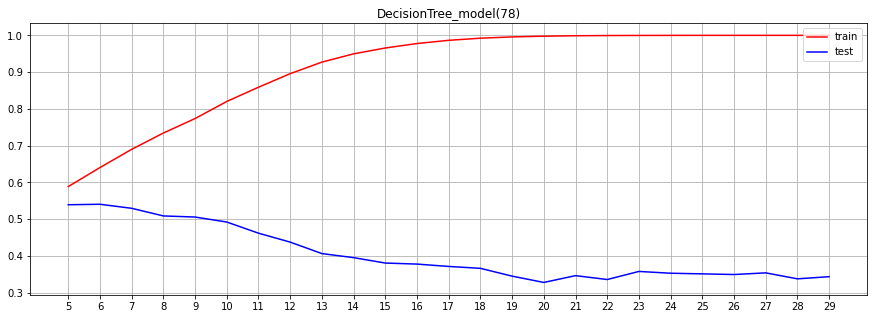

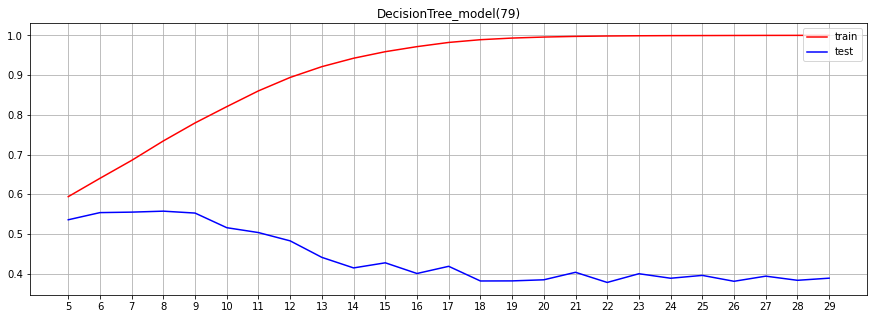

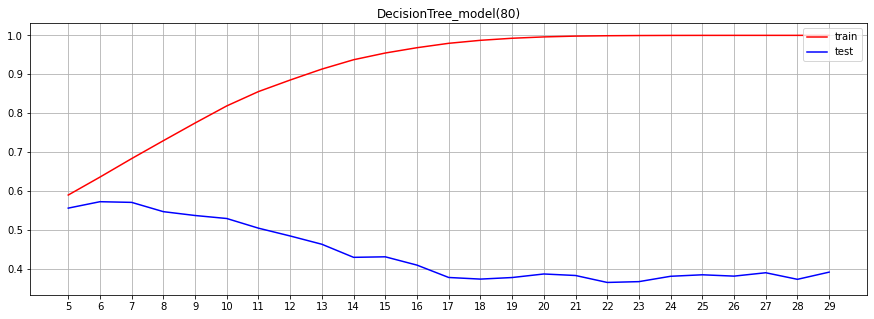

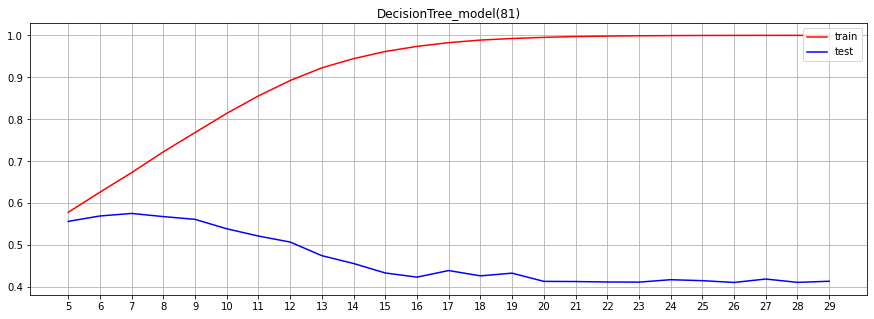

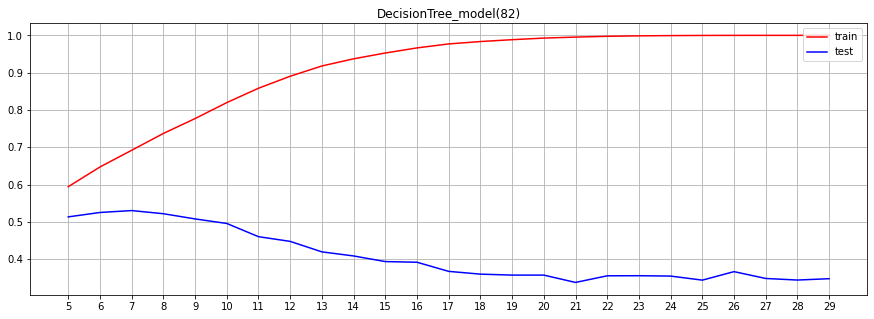

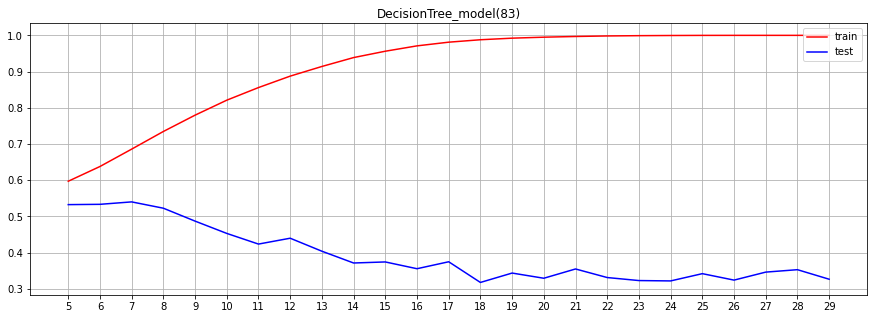

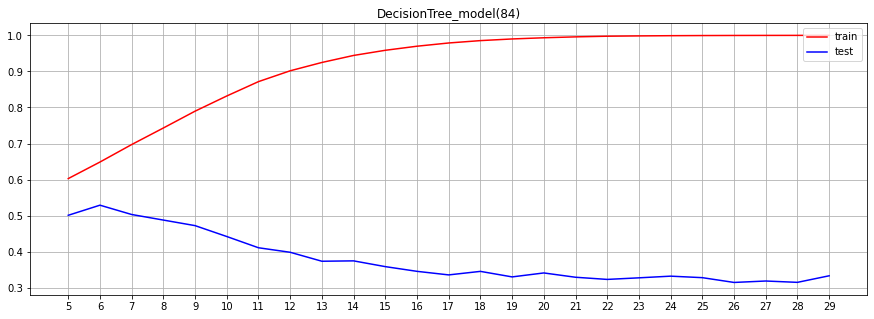

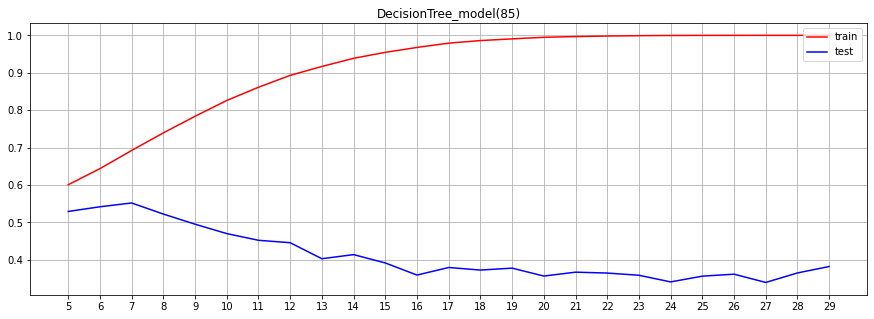

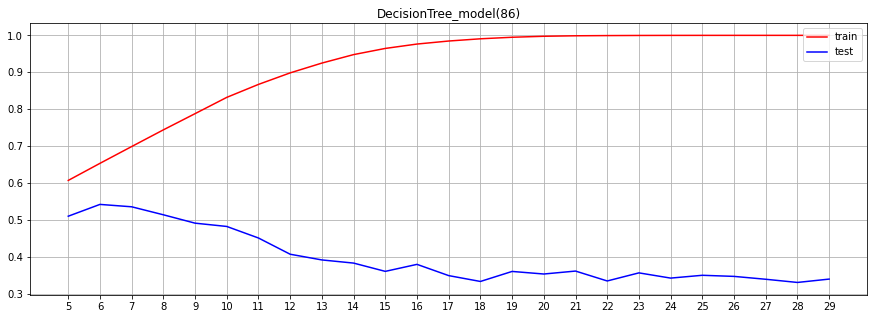

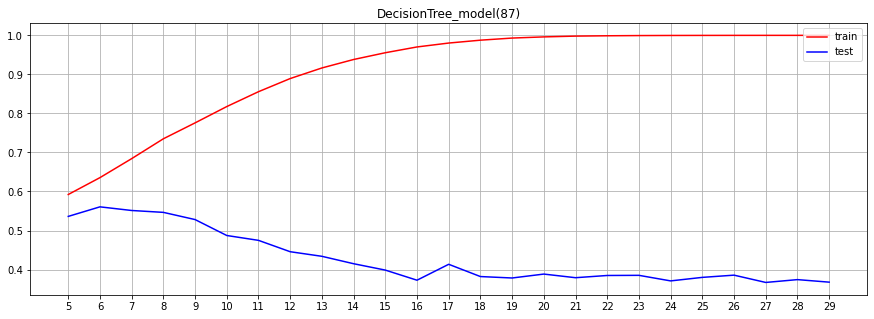

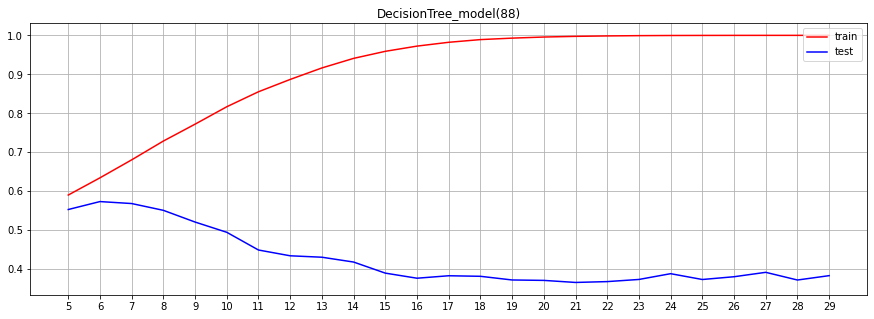

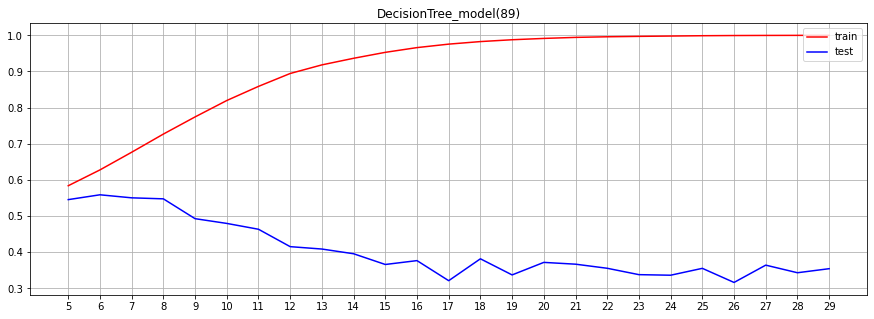

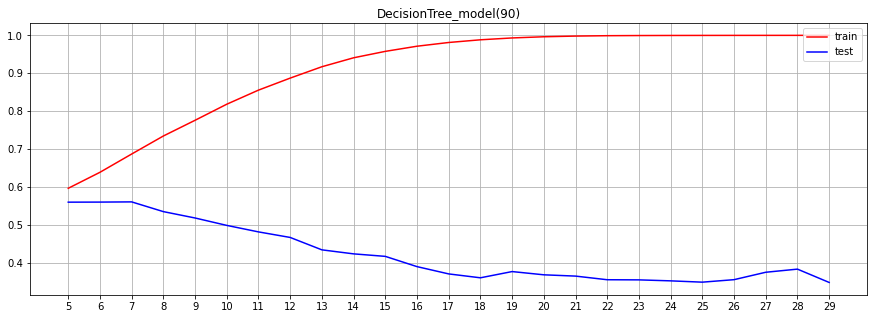

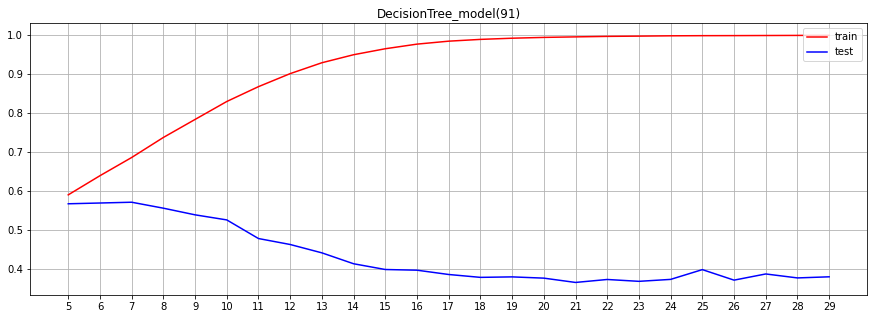

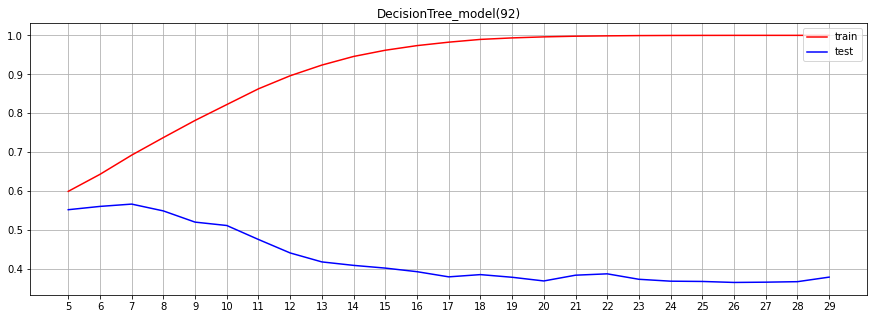

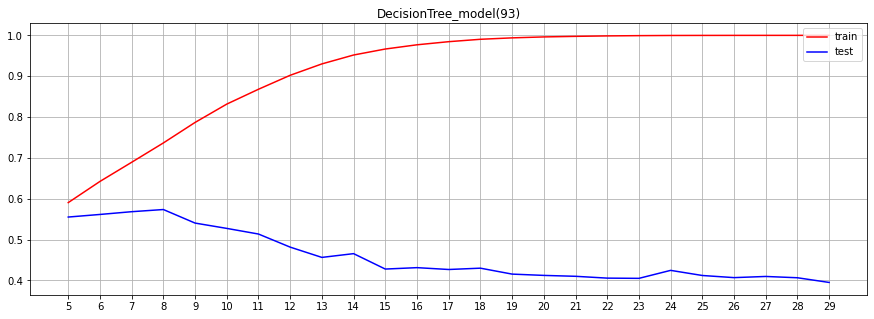

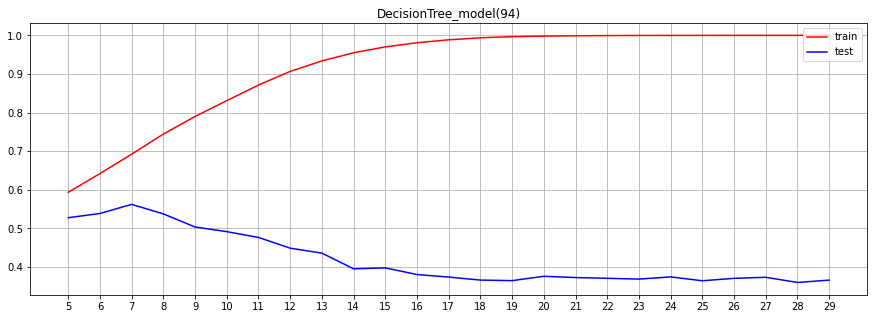

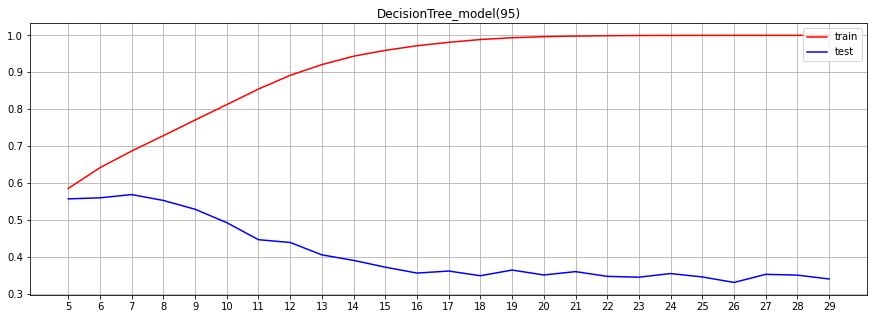

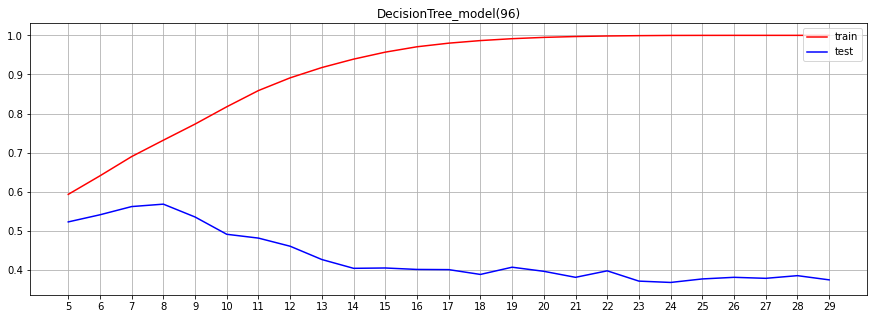

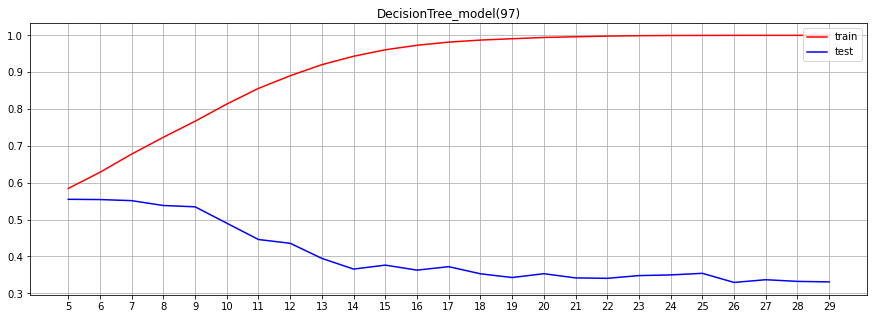

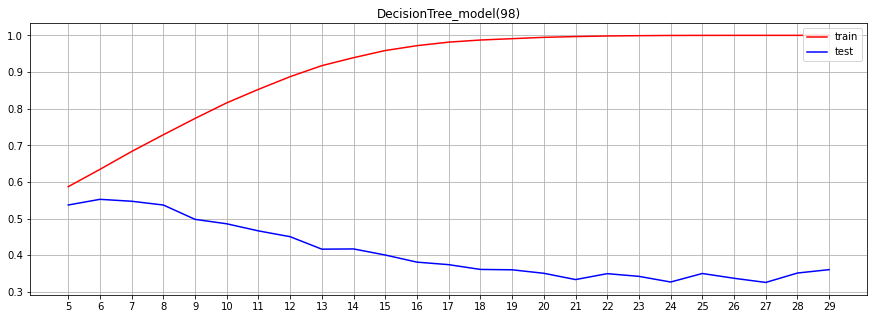

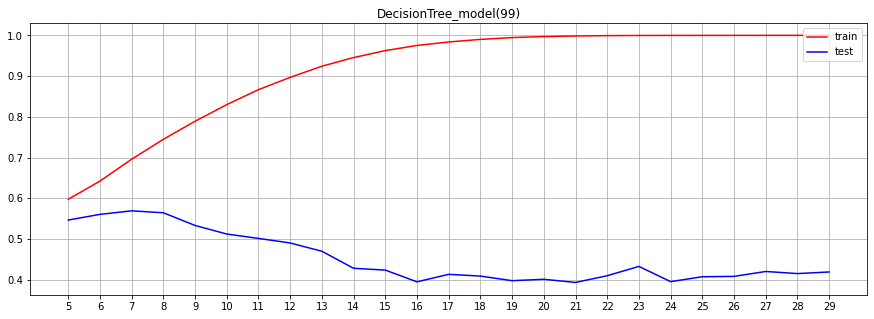

In [18]:
from sklearn.tree import DecisionTreeRegressor

for i in range(100) :
    X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=i)
    train_acc = []
    test_acc = []

    max_depth = range(5, 30, 1)
    for d in max_depth :
        dt_model = DecisionTreeRegressor(max_depth = d)
        dt_model.fit(X_train2, y_train2)
        train_acc.append(dt_model.score(X_train2, y_train2))
        test_acc.append(dt_model.score(X_val, y_val))
    plt.figure(figsize=(15, 5))
    plt.plot(max_depth, train_acc, c='r', label = 'train')
    plt.plot(max_depth, test_acc, c='b', label = 'test')
    plt.xticks( range(5, 30, 1))
    plt.grid()
    plt.title(f'DecisionTree_model({i})')
    plt.legend(loc='upper right')
    plt.show()

In [21]:
#64-6/
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=64)

dt_model = DecisionTreeRegressor(max_depth = 6)
dt_model.fit(X_train2, y_train2)

submission['PRICE'] = dt_model.predict(X_test)


In [22]:
submission.to_csv('reg_data/pred_DT_model_by_Mdepth.csv', index=False)

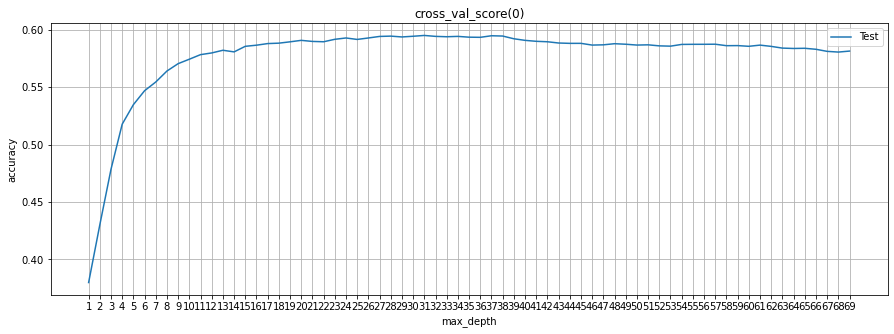

ValueError: x and y must have same first dimension, but have shapes (69,) and (138,)

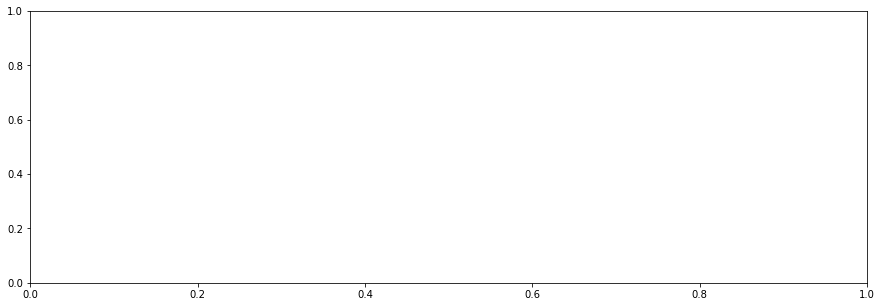

In [47]:
from sklearn.model_selection import cross_val_score

test_score = []
for i in range(100) :
    for d in range(1,70) :
        model = DecisionTreeRegressor(min_samples_leaf= d, random_state=i)
        result = cross_val_score(model, X_train, y_train, cv = 5)
        test_score.append(result.mean())

    plt.figure(figsize=(15,5))
    plt.plot(range(1,70), test_score, label = 'Test')
    plt.xticks(range(1,70))
    plt.grid()
    plt.legend()
    plt.ylabel('accuracy')
    plt.xlabel('max_depth')
    plt.title(f'cross_val_score({i})')
    plt.show()

In [44]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=64)

dt_model = DecisionTreeRegressor(min_samples_split= 113)
dt_model.fit(X_train2, y_train2)

submission['PRICE'] = dt_model.predict(X_test)


In [45]:
submission.to_csv('reg_data/pred_DT_model_by_mSampleSplit.csv', index=False)

In [48]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=64)

dt_model = DecisionTreeRegressor(min_samples_leaf= 31)
dt_model.fit(X_train2, y_train2)

submission['PRICE'] = dt_model.predict(X_test)


In [49]:
submission.to_csv('reg_data/pred_DT_model_by_mSampleLeaf.csv', index=False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

test_score = []
for i in range(1,50):
    rf_model = RandomForestRegressor(
            n_estimators = 70,   # 깅할 모델 갯수
            max_features = 0.9,   # 각 모델이 랜덤하게 사용할 특성 수
            max_depth = 13,        # 각 모델의 최대 깊이 : 6/7
            min_samples_leaf = i,# 리프 노드의 최소 샘플 수
            random_state = 18     # 난수 고정
                                     )
    result = cross_val_score(rf_model, X_train, y_train, cv = 5)
    test_score.append(result.mean())

plt.figure(figsize=(20,5))
plt.plot(range(1,50), test_score, label = 'Test')
plt.xticks(range(1,50))
plt.grid()
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.title('cross_val_score')
plt.show()

In [81]:
rf_model = RandomForestRegressor(
            n_estimators = 70,   # 깅할 모델 갯수 : 70, 79
            max_features = 0.9,   # 각 모델이 랜덤하게 사용할 특성 수
            max_depth = 13,        # 각 모델의 최대 깊이 : 6/7--13
            min_samples_leaf = 31,# 리프 노드의 최소 샘플 수
            random_state = 18     # 난수 고정
                                     )
rf_model.fit(X_train,y_train)
submission['PRICE'] = rf_model.predict(X_test)

In [82]:
submission.to_csv('reg_data/pred_randomForest.csv', index=False)

### 결측치 채우는 방법
- 수치형 데이터
    - 기술 통계(평균 or 중간값)
    - 결측치가 적은 경우 : 전체 평균이나 중간값을 대입
    - 결측치가 많은 경우(20~30%) : 결측치가 있는 데이터의 다른 컬럼과 같은 값을 갖는(동일한 특성을 갖는) 데이터의 결측치 통계(평균, or 중간값)를 사용 (피벗 테이블을 이용할 것임)
- 범주형 데이터
    - 결측치가 적은 경우 : 데이터 수가 가장 많은 클래스로 할당 >> 기존 데이터가 결측치가 있는 데이터에 의해 영향을 덜 받기 때문에)
    - 결측치가 많은 경우 : 데이터 수가 가장 많은 클래스로 할당 >> 편향이 됨 >> 기존 데이터의 개수 비율만큼 랜덤으로 할당

## 3.7 데이터 시각화 하기
- test데이터를 활용하지 않고 train데이터를 이용해서 시각화/탐색하는게 좋다.

- 범주형 데이터(Categorical Data) 시각화
- 빈도 기반의 bar chart 많이 활용

- 수치형 데이터 시각화
    - 구간을 나눠서 종합하는 히스토그램
    - 커널 밀도 추정 그래프
    
- 바이올린 플롯 그래프 시각화
    - 박스 + KDE 그래프
- 텍스트 데이터
    - 비정형 데이터 >> 단어 중심 시각화
    - wordcloud
- 빈도 기반의 시각화 가능 : countplot

## 4. 특성 공학(Feature Engineering)
- feature에서 유의미한 컬럼을 추출하거나 병합하는 행위

### 4.2 비정형 데이터 다루기(Name)
- 틀이 없는, 형태가 정해져 있지 않음
- 텍스트 데이터, 이미지 데이터, 음성 데이터

###  사용하지 않을 칼럼 정리

## 모델링
- 인코딩(문자 형태의 데이터를 숫자 형태로 변환)
    - label encoding : 순서가 있는 범주형 데이터에 사용
    - one-hot-encoding : 순서가 없는 범주형 데이터에 사용 / pd.get_dummies(데이터)
        - 순서가 없는 범주형 데이터 : 성별
        - 순서가 있는 범주형 데이터 : 학점
- 특성 선택(feature selection) : 상관계수(.corr() : 양수-비례관계, 음수-반비례관계, 0-서로 영향X, 절대값이 클수록 상관관계 큼)
- 모델 선택 및 하이퍼파라미터 튜닝
- 모델 학습 및 평가

## 5.2 특성 선택
- 예측 결과에 영향을 줄 특성들을 골라본다.
- Family와 Family_cat이 비슷한 특성이기 때문에 선택해보자.

## 5.3 학습
- KNN모델과 Decision Tree모델 활용

## 데이터 스케일링(Data Scaling)
- 특성들의 범위를 정규화 해주는 작업
- 특성마다 다른 범위를 가지는 경우, 머신러닝 모델들이 제대로 학습되지 않을 가능성이 있다.
    - KNN, SVM, Neural network(신경망) 모델, Clustering 모델 등 (데이터 스케일링의 영향을 많이 받는 모델)
    - 시력과 키를 함께 학습시킬 경우, 키의 범위가 크기 때문에 거리 값을 기반으로 학습할 때 영향을 많이 준다.
    - 시력 0.5 ~ 2.0(폭 1.5) / 키 150 ~ 190(폭 40) >> 정규화가 필요
    
#### 장점
- 특성들을 비교 분석하기 쉽게 만들어 준다.
- Linear Model, Neural network Model 등에서 학습의 안정성과 속도를 개선시킨다.
- 하지만 특성에 따라 원래 범위를 유지하는 것이 성능에 더 좋을 때에는 스케일링을 해 주지 않아도 된다.


### 종류
#### StandardScaler
- 평균과 표준편차를 이용한 방법
- 평균은 극단적인 값(이상치)들의 영향을 많이 받음
#### MinMaxScaler
- 최대, 최솟값을 이용한 방법 (공식, 교재 122쪽 중간 참고)
- 모든 데이터 값이 0 ~ 1 사이의 값으로 조정됨
#### RobustScaler
- 사분위 수를 이용한 스케일러
- 데이터에 이상치가 많을 때 사용하면 좋은 스케일러
#### Normalizer
- 데이터의 크기는 고려하지 않고
- 데이터의 방향을 중요시할 때 사용하는 스케일러
- 추천 알고리즘에 많이 사용
    - 예를 들어 음식 추천 알고리즘 :
    - 나와 근접한 사람은 누가 있을까? 그 사람들이 좋아하는 음식을 추천
    - 1번과 3번보다는 1번과 2번을 비교해 보면 거리가 1번과 2번이 더 멀기 때문에 컴퓨터가 3번을 추천해버리는 문제가 발생!!
- 원점으로부터의 방향만 비교하면 비슷한 취향으로 추천 가능
- 원처럼 동그란 데이터를 갖게 됨

### 주의점
- 훈련 세트와 테스트 세트에 같은 변환을 적용해야 한다.
- 예를 들어 StandardScaler의 경우 훈련 세트의 평균과 표준편차를 이용해 훈련세트를 변환하고 테스트 세트의 평균과 표준편차를 이용해 테스트 세트를 변환하면 잘못된 결과가 나온다.
- 훈련 데이터를 쓰던지 테스트 데이터를 쓰던지 모두 훈련 데이터를 기준으로 스케일링을 해야한다!

### 5.4 하이퍼 파라미터 튜닝
- KNN모델과 DecisionTree 모델을 최적화 해보자.
- KNN : 이웃 숫자
- Tree : 나무의 깊이, 리프노드의 갯수, 한 리프노드에 들어갈 샘플 수 등

### 모델 평가
- KNN의 이웃 수 : 7결정
- DecisionTree의 최대 깊이 : 4결정

# 성능 개선을 위해 고려해 볼 사항
1. 특성 선택
2. 데이터 확보
3. 전처리 작업 변경(결측치 처리 방법, 특성 공학, 스케일링 등)
4. 모델 변경 - 앙상블 : 모델을 여러개 엮어서 쓰는 것